In [4]:
import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import io
import pandas as pd
import pandas_datareader.data as web
import pandas.plotting
from pandas.plotting import register_matplotlib_converters
import pandas.testing #pandas.testing.assert_frame_equal
from pandas.testing import assert_frame_equal #assert_frame_equal

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib import style

import mplfinance as mpf
import mpl_finance as mplf
from mpl_finance import candlestick_ohlc

import collections
from collections import Counter

import sklearn
from sklearn import svm, neighbors
from sklearn.svm import LinearSVC 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

style.use('ggplot')

In [5]:
# Parts 1-3: Using Stock Market Data
# Here we are using Tesla (ticker = TSLA) as an example.
#df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 'Date')
start = dt.datetime(2020,1,1)
end = dt.datetime.now()
df = web.DataReader('TSLA', 'yahoo', start, end)
df.to_csv('tsla.csv')

print(df.tail(10))

daily = pd.read_csv('tsla.csv', index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)
mpf.plot(daily)

TypeError: string indices must be integers, not 'str'

In [ ]:
mpf.plot(daily, type='candle', mav = (3, 6, 9), volume = True)

NameError: name 'mpf' is not defined

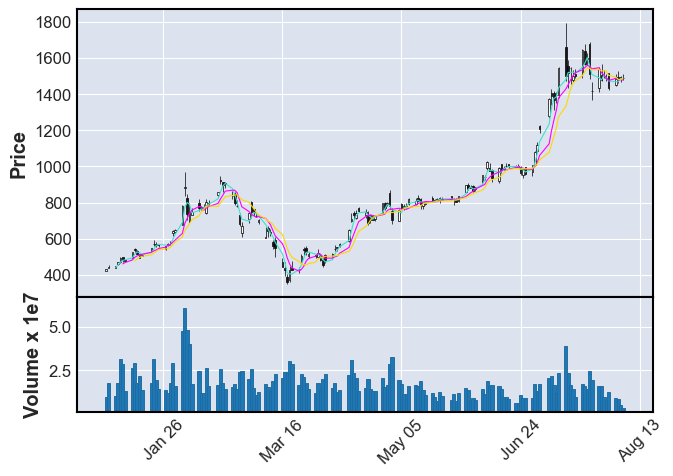

In [ ]:
mpf.plot(daily, type = 'candle', mav =(3, 6, 9), volume = True, show_nontrading = True)

In [ ]:
# Plot intraday data:
# intraday = pd.read_csv('examples/data/SP500_NOV2019_IDay.csv',index_col=0,parse_dates=True)
# intraday = intraday.drop('Volume',axis=1) # Volume is zero anyway for this intraday data set
# intraday.index.name = 'Date'
# intraday.shape
# intraday.head(3)
# intraday.tail(3)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2020-07-24  202.860001  197.509995  200.419998  201.300003  39827000.0   
2020-07-27  203.970001  200.860001  201.470001  203.850006  30160900.0   
2020-07-28  204.699997  201.740005  203.610001  202.020004  23251400.0   
2020-07-29  204.649994  202.009995  202.500000  204.059998  19632600.0   
2020-07-30  204.460007  199.570007  201.000000  203.899994  25079600.0   
2020-07-31  205.100006  199.009995  204.399994  205.009995  51248000.0   
2020-08-03  217.639999  210.440002  211.520004  216.539993  78983000.0   
2020-08-04  214.770004  210.309998  214.169998  213.289993  49280100.0   
2020-08-05  215.000000  211.570007  214.899994  212.940002  28806400.0   
2020-08-06  214.539993  211.550003  212.339996  213.750000  16058203.0   

             Adj Close  
Date                    
2020-07-24  201.300003  
2020-07-27  203.850006  
2020-07-28 

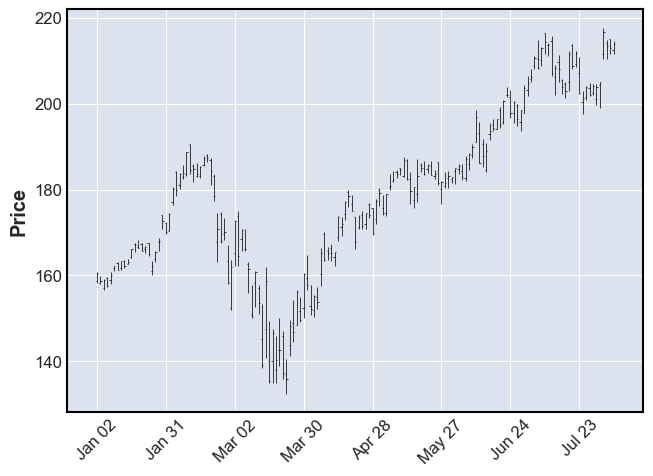

In [ ]:
start = dt.datetime(2020,1,1)
end = dt.datetime.now()
df = web.DataReader('MSFT', 'yahoo', start, end)
df.to_csv('msft.csv')

print(df.tail(10))

daily = pd.read_csv('msft.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
daily.shape
daily.head(3)
daily.tail(3)
mpf.plot(daily)

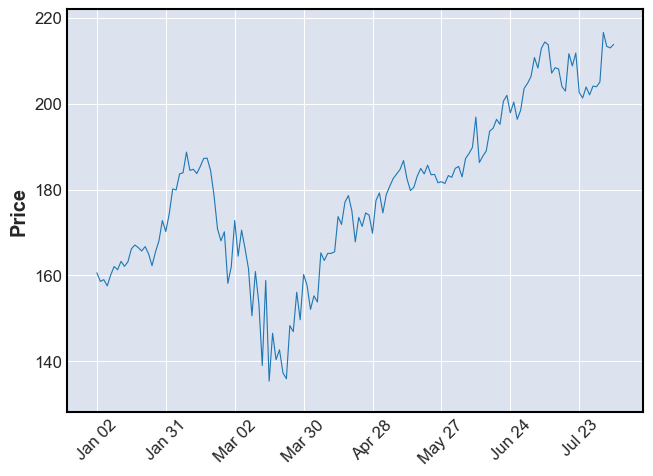

In [ ]:
mpf.plot(daily, type='line')

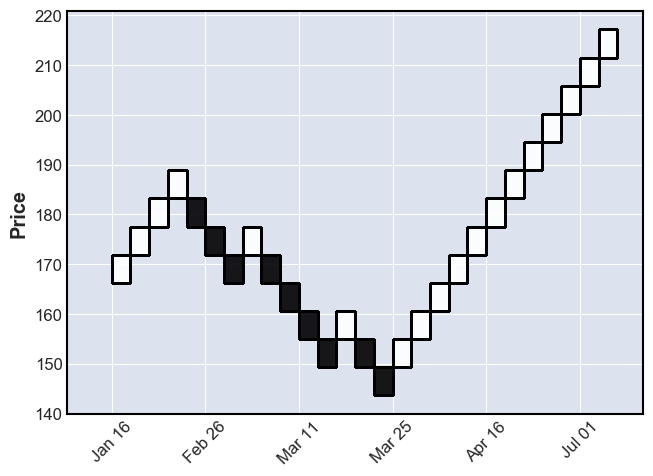

In [ ]:
mpf.plot(daily, type='renko')

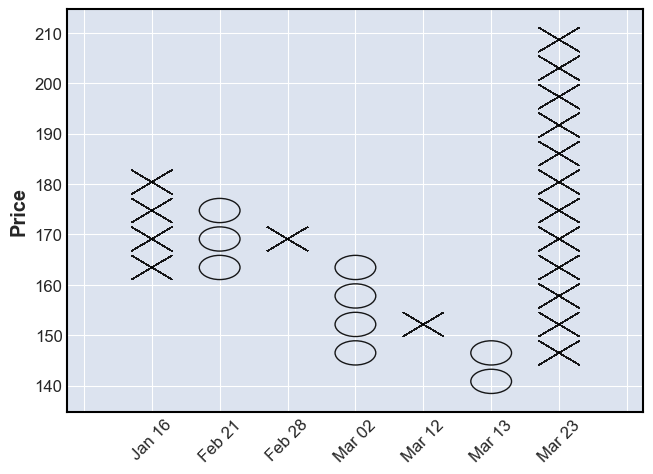

In [ ]:
mpf.plot(daily, type='pnf')

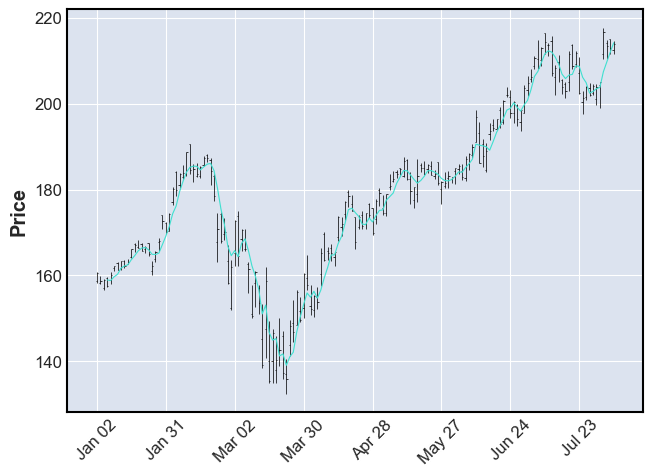

In [ ]:
mpf.plot(daily, type = 'ohlc', mav=4)

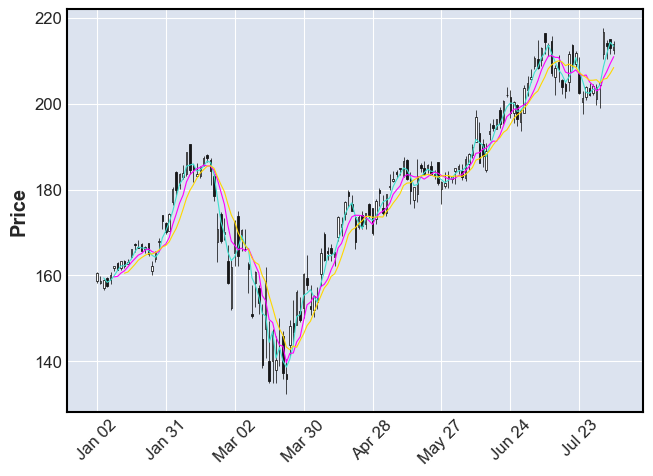

In [ ]:
mpf.plot(daily, type='candle', mav=(3,6,9))

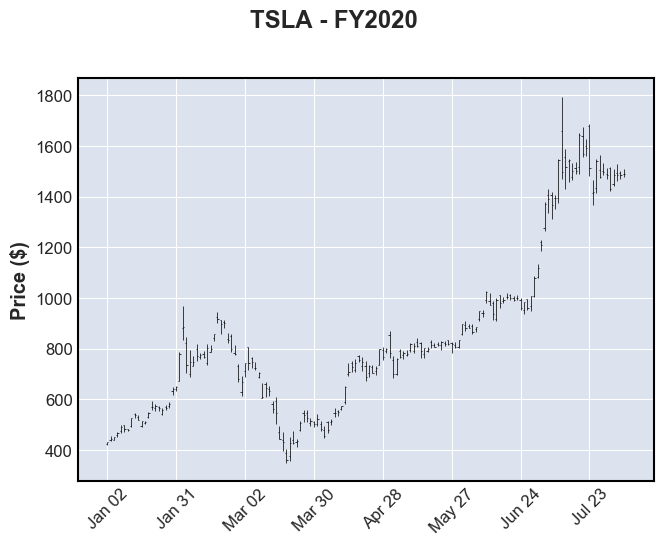

In [ ]:
datafile = 'tsla.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Convert dates from string to datetime format
data.index = pd.to_datetime(data.index)
data

mpf.plot(
    data,
    title = 'TSLA - FY2020',
    ylabel = 'Price ($)')

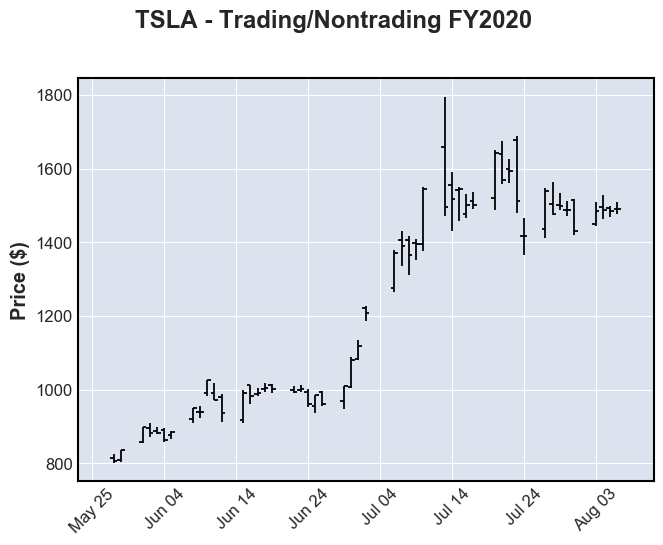

In [ ]:
mpf.plot(
    data[-50:],
    title = 'TSLA - Trading/Nontrading FY2020',
    ylabel = 'Price ($)',
    show_nontrading = True)
plt.show()

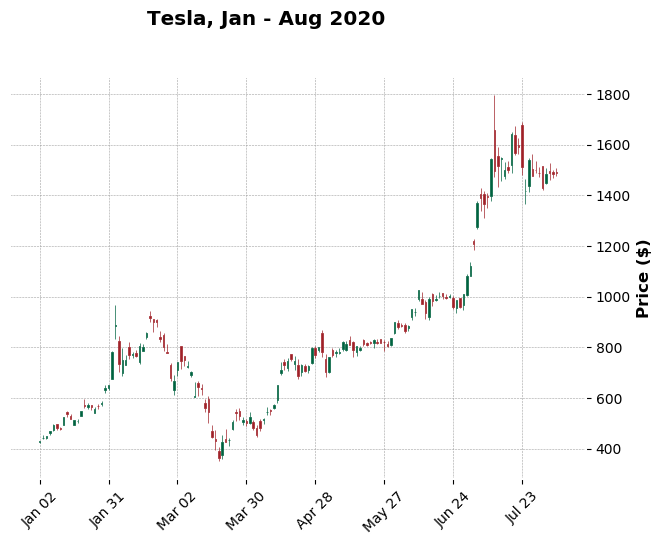

In [ ]:
mpf.plot(
    data,
    #data[-50:],
    type ='candle',
    style = 'charles',
    title = 'Tesla, Jan - Aug 2020',
    ylabel = 'Price ($)',
    #show_nontrading = True
)
#    data[-50:], type='candlestick', show_nontrading = True)

In [ ]:
df = web.DataReader('TSLA', 'yahoo', start, end)
df.to_csv('tsla.csv')
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 'Date')

df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
df.dropna(inplace = True)
print(df.tail())

                   High          Low         Open        Close    Volume  \
Date                                                                       
2020-07-31  1517.050049  1420.979980  1515.000000  1430.760010  12247000   
2020-08-03  1509.810059  1444.380005  1449.199951  1485.000000   8809300   
2020-08-04  1527.410034  1462.000000  1495.010010  1487.000000   8415000   
2020-08-05  1499.839966  1468.310059  1492.989990  1485.020020   4947800   
2020-08-06  1509.000000  1477.260010  1490.829956  1488.457031   3374026   

              Adj Close       100ma  
Date                                 
2020-07-31  1430.760010  906.253601  
2020-08-03  1485.000000  914.761301  
2020-08-04  1487.000000  924.025801  
2020-08-05  1485.020020  933.409802  
2020-08-06  1488.457031  943.843672  


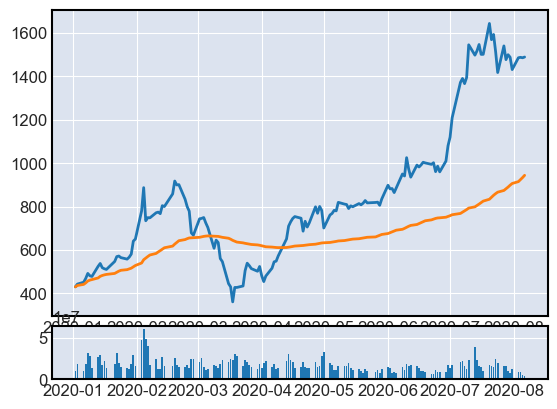

In [ ]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()

In [ ]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace = True)
print(df_ohlc.head())

        Date       open       high        low      close
0 2010-06-29  23.889999  23.889999  15.800000  17.459999
1 2010-07-09  17.400000  20.639999  17.049999  20.639999
2 2010-07-19  21.910000  21.910000  20.219999  20.719999
3 2010-07-29  20.350000  21.950001  19.590000  19.590000
4 2010-08-08  19.600000  19.600000  17.600000  19.150000


In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

       Date       open       high        low      close
0  733952.0  23.889999  23.889999  15.800000  17.459999
1  733962.0  17.400000  20.639999  17.049999  20.639999
2  733972.0  21.910000  21.910000  20.219999  20.719999
3  733982.0  20.350000  21.950001  19.590000  19.590000
4  733992.0  19.600000  19.600000  17.600000  19.150000


In [ ]:
df_ohlc.head()

Date       open       high        low      close
0  733952.0  23.889999  23.889999  15.800000  17.459999
1  733962.0  17.400000  20.639999  17.049999  20.639999
2  733972.0  21.910000  21.910000  20.219999  20.719999
3  733982.0  20.350000  21.950001  19.590000  19.590000
4  733992.0  19.600000  19.600000  17.600000  19.150000

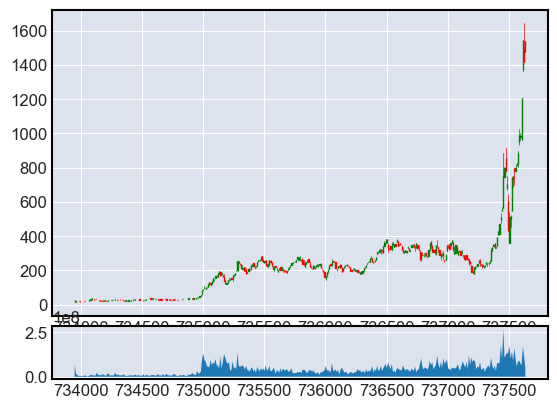

In [ ]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)

#mplfinance.plot(ax1, df_ohlc.values, width = 2, colorup = 'g')
# only takes one positional argument??
candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

In [ ]:
# Part 4: Resampling
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
print(df.tail(10))

df_ohlc = df['Adj Close'].resample('10D').mean()

# Resample data for 10 day period
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace = True)

# Convert datetime object to mdate
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

                   High          Low         Open        Close    Volume  \
Date                                                                       
2020-07-20  1650.000000  1488.000000  1519.010010  1643.000000  17121400   
2020-07-21  1675.000000  1558.000000  1639.930054  1568.359985  16157300   
2020-07-22  1626.420044  1562.000000  1599.000000  1592.329956  14161100   
2020-07-23  1689.000000  1480.770020  1678.949951  1513.069946  24328500   
2020-07-24  1465.000000  1366.540039  1416.010010  1417.000000  19396600   
2020-07-27  1547.939941  1413.000000  1435.000000  1539.599976  16048700   
2020-07-28  1564.699951  1474.420044  1504.000000  1476.489990  15808700   
2020-07-29  1534.810059  1487.000000  1501.000000  1499.109985   9426900   
2020-07-30  1513.239990  1471.000000  1488.000000  1487.489990   7600200   
2020-07-31  1517.050049  1477.310059  1515.000000  1478.689941   1759973   

              Adj Close       100ma  
Date                                 
2020-07-20 

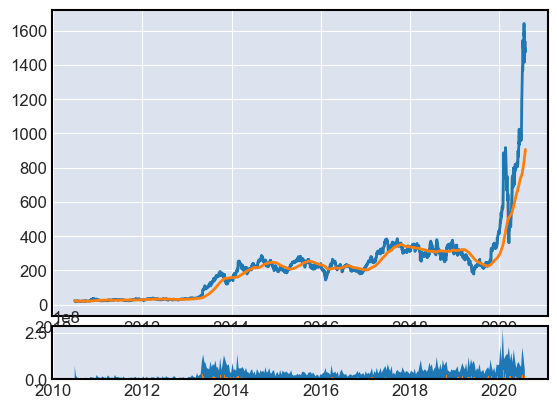

In [ ]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan = 1, colspan = 1, sharex = ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width = 3, colorup = 'g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
                 
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [ ]:
# Part 5: Getting S&P500 List
def save_sp500_tickers():
    resp = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, "lxml")
    table = soup.find('table', {'id': 'constituents'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.find_all('td')[0].text.strip()
        tickers.append(ticker)

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)

    print(tickers)

    return tickers

save_sp500_tickers()

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BK',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'BIIB',
 'BLK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA',
 'CAG',
 'CXO'

In [ ]:
# Part 6: Getting Stock Prices
# Get data from Yahoo and call SP500 tickers list as sp500
def get_data_from_yahoo(reload_sp500 = False):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)

# Take all of the data for stocks and store in a directory
# Working with API, parsing website, take entire dataset and store locally
# Here we will look at Adjusted Close, but we can look at other columns later
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
    
    start = dt.datetime(2000,1,1)
    end = dt.datetime(2020,5,28)

    # Grab all ticker data
    for ticker in tickers:
        print(ticker)    
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            try:
                df = web.DataReader(ticker, 'yahoo', start, end)
                df.to_csv('stock_dfs/{}.csv'.format(ticker))
            except:
                print(f'Problems retrieving data for {ticker}. Skipping!')
            else:
                print('Already have {}'.format(ticker))

get_data_from_yahoo()

MMM
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
ALLE
LNT
ALL
GOOGL
GOOG
MO
AMZN
AMCR
AEE
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
APH
ADI
ANSS
ANTM
AON
AOS
APA
AIV
AAPL
AMAT
APTV
ADM
ANET
AJG
AIZ
T
ATO
ADSK
ADP
AZO
AVB
AVY
BKR
BLL
BAC
BK
BAX
BDX
BRK.B
BBY
BIO
BIIB
BLK
BA
BKNG
BWA
BXP
BSX
BMY
AVGO
BR
BF.B
CHRW
COG
CDNS
CPB
COF
CAH
KMX
CCL
CARR
CAT
CBOE
CBRE
CDW
CE
CNC
CNP
CTL
CERN
CF
SCHW
CHTR
CVX
CMG
CB
CHD
CI
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
CXO
COP
ED
STZ
COO
CPRT
GLW
CTVA
COST
COTY
CCI
CSX
CMI
CVS
DHI
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DXCM
FANG
DLR
DFS
DISCA
DISCK
DISH
DG
DLTR
D
DPZ
DOV
DOW
DTE
DUK
DRE
DD
DXC
ETFC
EMN
ETN
EBAY
ECL
EIX
EW
EA
EMR
ETR
EOG
EFX
EQIX
EQR
ESS
EL
EVRG
ES
RE
EXC
EXPE
EXPD
EXR
XOM
FFIV
FB
FAST
FRT
FDX
FIS
FITB
FE
FRC
FISV
FLT
FLIR
FLS
FMC
F
FTNT
FTV
FBHS
FOXA
FOX
BEN
FCX
GPS
GRMN
IT
GD
GE
GIS
GM
GPC
GILD
GL
GPN
GS
GWW
HRB
HAL
HBI
HIG
HAS
HCA
PEAK
HSIC
HSY
HES
HPE
HLT
HFC
HOLX
HD
HON
HRL
HST
HWM
HPQ
HUM


In [ ]:
# Part 7: Combine S&P500 List with Adjusted Close Price for All Companies
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
    mainDataSet = pd.DataFrame()

# Count in SP500 tickers list
    for count, ticker in enumerate(tickers):
        fileDataSet = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
        fileDataSet.set_index('Date', inplace = True)
        fileDataSet.rename(columns = {'Adj Close':ticker}, inplace = True)
        fileDataSet.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace = True)

        if mainDataSet.empty:
            mainDataSet = fileDataSet
        else:
            mainDataSet = mainDataSet.join(fileDataSet)
        print(mainDataSet.head())
    mainDataSet.to_csv('sp500_joined_closes.csv')
compile_data()  

                  MMM
Date                 
2000-01-03  28.311874
2000-01-04  27.186905
2000-01-05  27.974379
2000-01-06  30.224340
2000-01-07  30.824324
                  MMM       ABT
Date                           
2000-01-03  28.311874  6.564564
2000-01-04  27.186905  6.377004
2000-01-05  27.974379  6.365284
2000-01-06  30.224340  6.588011
2000-01-07  30.824324  6.658342
                  MMM       ABT  ABBV
Date                                 
2000-01-03  28.311874  6.564564   NaN
2000-01-04  27.186905  6.377004   NaN
2000-01-05  27.974379  6.365284   NaN
2000-01-06  30.224340  6.588011   NaN
2000-01-07  30.824324  6.658342   NaN
                  MMM       ABT  ABBV      ABMD
Date                                           
2000-01-03  28.311874  6.564564   NaN  18.25000
2000-01-04  27.186905  6.377004   NaN  17.81250
2000-01-05  27.974379  6.365284   NaN  18.00000
2000-01-06  30.224340  6.588011   NaN  18.03125
2000-01-07  30.824324  6.658342   NaN  17.93750
                  MM

2000-01-07  16.250  NaN  28.221029  5.373407  40.424248  20.138605  248.375  
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES       AFL          A        APD     AKAM  \
Date                                                                          
2000-01-03  15.500  NaN  28.294199  5.336146  44.777622  18.104057  321.250   
2000-01-04  14.625  NaN  27.172190  5.194542  41.357113  17.552309  300.000   
2000-01-05  15.000  NaN  27.464891  5.164732  38.791721  17.655748

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...          A        APD     AKAM  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  44.777622  18.104057  321.250   
2000-01-04  14.625  NaN  27.172190  ...  41.357113  17.552309  300.000   
2000-01-05  15.000  NaN  27.464891  ...  38.791721  17.655748  283.500   
2000-01-06  16.000  NaN  27.684412  ...  37.314693  18.828213  236.125   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  ALGN  ALLE       LNT        ALL  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...   NaN   NaN  5.336293  14.409927   
2000-01-04  14.625  NaN  27.172190  ...   NaN   NaN  5.336293  13.950034   
2000-01-05  15.000  NaN  27.464891  ...   NaN   NaN  5.597509  14.563220   
2000-01-06  16.000  NaN  27.684412  ...   NaN   NaN  5.597509  14.486568   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        MO     AMZN  AMCR        AEE  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  1.819708  89.3750   NaN  11.942023   
2000-01-04  14.625  NaN  27.172190  ...  1.834266  81.9375   NaN  11.942023   
2000-01-05  15.000  NaN  27.464891  ...  1.824561  69.7500   NaN  12.403996   
2000-01-06  16.000  NaN  27.684412  ...  1.790593  65.5625   NaN 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...          AIG        AMT  AWK  AMP  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.294199  ...  1002.118225  25.186090  NaN  NaN   
2000-01-04  14.625  NaN  27.172190  ...   950.897522  24.917585  NaN  NaN   
2000-01-05  15.000  NaN  27.464891  ...   953.157166  25.669407  NaN  NaN   
2000-01-06  16.000  NaN  27.684412  ...   982.231995  25.400898  NaN  NaN  

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       AMGN       APH        ADI  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  50.853237  3.851934  30.618002   
2000-01-04  14.625  NaN  27.172190  ...  46.964756  3.719480  29.069048   
2000-01-05  15.000  NaN  27.464891  ...  48.580750  3.637143  29.493437   
2000-01-06  16.000  NaN  27.684412  ...  49.388741  3.536906  28.687130   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       AOS        APA        AIV  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  0.643602  11.709501  10.057044   
2000-01-04  14.625  NaN  27.172190  ...  0.634328  11.194800   9.924721   
2000-01-05  15.000  NaN  27.464891  ...  0.632473  11.516488  10.023967   
2000-01-06  16.000  NaN  27.684412  ...  0.623199  12.610233  10.222464   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  AIZ          T       ATO      ADSK  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  NaN  17.282593  8.780582  8.052903   
2000-01-04  14.625  NaN  27.172190  ...  NaN  16.271378  8.561753  7.660817   
2000-01-05  15.000  NaN  27.464891  ...  NaN  16.524181  8.835291  7.178246   
2000-01-06  16.000  NaN  27.684412  ...  NaN  16.175280  8.698522

[5 rows x 67 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        AVB        AVY        BKR  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  15.067223  41.993992  10.526615   
2000-01-04  14.625  NaN  27.172190  ...  14.734252  41.442417  10.526615   
2000-01-05  15.000  NaN  27.464891  ...  14.872992  42.802998  10.591587   
2000-01-06  16.000  NaN  27.684412  ...  15.372456  44.310

[5 rows x 72 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...         BK        BAX        BDX  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  25.558714  11.154243  19.089441   
2000-01-04  14.625  NaN  27.172190  ...  24.824766  10.904355  18.588293   
2000-01-05  15.000  NaN  27.464891  ...  24.263496  11.381418  18.724966   
2000-01-06  16.000  NaN  27.684412  ...  24.867937  11.619

[5 rows x 78 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       BIIB        BLK         BA  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  31.083334  11.313210  25.741438   
2000-01-04  14.625  NaN  27.172190  ...  28.979166  10.802842  25.701408   
2000-01-05  15.000  NaN  27.464891  ...  31.000000  10.717777  27.302753   
2000-01-06  16.000  NaN  27.684412  ...  32.375000  10.887

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  AVGO  BR      BF.B      CHRW  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...   NaN NaN  1.056217  6.855355   
2000-01-04  14.625  NaN  27.172190  ...   NaN NaN  1.036743  6.625382   
2000-01-05  15.000  NaN  27.464891  ...   NaN NaN  1.044762  6.537773   
2000-01-06  16.000  NaN  27.684412  ...   NaN NaN  1.051635  6.570628   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        CPB        COF        CAH  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  20.845127  36.145565  16.953266   
2000-01-04  14.625  NaN  27.172190  ...  20.075670  33.895641  16.759890   
2000-01-05  15.000  NaN  27.464891  ...  20.026398  33.113079  17.941675   
2000-01-06  16.000  NaN  27.684412  ...  20.448750  34.629311  18.564796   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  CBOE  CBRE  CDW  CE  CNC       CNP  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...   NaN   NaN  NaN NaN  NaN  6.079404   
2000-01-04  14.625  NaN  27.172190  ...   NaN   NaN  NaN NaN  NaN  6.147709   
2000-01-05  15.000  NaN  27.464891  ...   NaN   NaN  NaN NaN  NaN  6.403867   
2000-01-06  16.000  NaN  27.684412  ...   NaN   NaN  NaN NaN  NaN

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  CF       SCHW  CHTR        CVX  CMG  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ... NaN  20.056469   NaN  17.167484  NaN   
2000-01-04  14.625  NaN  27.172190  ... NaN  19.785444   NaN  17.167484  NaN   
2000-01-05  15.000  NaN  27.464891  ... NaN  19.920959   NaN  17.475414  NaN   
2000-01-06  16.000  NaN  27.684412  ... NaN  19.920959   NaN

[5 rows x 113 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       CHD         CI       CINF  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  3.303076  23.584595  13.659487   
2000-01-04  14.625  NaN  27.172190  ...  3.223673  23.490625  13.645506   
2000-01-05  15.000  NaN  27.464891  ...  3.223673  23.396673  13.785316   
2000-01-06  16.000  NaN  27.684412  ...  3.334835  24.524212  

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  CFG       CTXS        CLX  CME  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  NaN  49.982899  28.627275  NaN   
2000-01-04  14.625  NaN  27.172190  ...  NaN  47.520329  27.863398  NaN   
2000-01-05  15.000  NaN  27.464891  ...  NaN  44.789551  28.590889  NaN   
2000-01-06  16.000  NaN  27.684412  ...  NaN  40.961594  28.845522  NaN   
2000-01-07

[5 rows x 125 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      CTSH         CL      CMCSA  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  1.922517  20.230127  12.436954   
2000-01-04  14.625  NaN  27.172190  ...  1.857432  19.702030  11.505847   
2000-01-05  15.000  NaN  27.464891  ...  1.960066  19.031754  11.206564   
2000-01-06  16.000  NaN  27.684412  ...  1.859935  18.991133  

[5 rows x 132 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...         ED       STZ        COO  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  12.767960  5.836346  14.346992   
2000-01-04  14.625  NaN  27.172190  ...  12.933472  5.616660  14.468577   
2000-01-05  15.000  NaN  27.464891  ...  13.524576  5.807055  14.559765   
2000-01-06  16.000  NaN  27.684412  ...  13.548223  6.034063  

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  COTY        CCI       CSX       CMI  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...   NaN  24.362835  3.501594  4.169108   
2000-01-04  14.625  NaN  27.172190  ...   NaN  24.337896  3.395484  4.053454   
2000-01-05  15.000  NaN  27.464891  ...   NaN  23.988785  3.466223  4.058960   
2000-01-06  16.000  NaN  27.684412  ...   NaN  23.140949  3.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       DRI       DVA         DE  DAL  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  6.254695  2.291667  13.984537  NaN   
2000-01-04  14.625  NaN  27.172190  ...  6.209535  2.250000  13.964153  NaN   
2000-01-05  15.000  NaN  27.464891  ...  6.435337  2.062500  14.290329  NaN   
2000-01-06  16.000  NaN  27.684412  ...  6.367594  2.000000  15.0

[5 rows x 154 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  DLR  DFS  DISCA  DISCK       DISH  \
Date                                ...                                      
2000-01-03  15.500  NaN  28.294199  ...  NaN  NaN    NaN    NaN  33.913342   
2000-01-04  14.625  NaN  27.172190  ...  NaN  NaN    NaN    NaN  32.666359   
2000-01-05  15.000  NaN  27.464891  ...  NaN  NaN    NaN    NaN  32.555019   
2000-01-06  16.000  NaN  27.684412  ...  NaN  N

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...         D  DPZ        DOV  DOW  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  5.982473  NaN  17.053835  NaN   
2000-01-04  14.625  NaN  27.172190  ...  6.129583  NaN  16.738024  NaN   
2000-01-05  15.000  NaN  27.464891  ...  6.296309  NaN  16.810896  NaN   
2000-01-06  16.000  NaN  27.684412  ...  6.364962  NaN  16.883785  NaN   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        DXC        ETFC       EMN  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  25.624720  248.264008  7.776294   
2000-01-04  14.625  NaN  27.172190  ...  25.452974  241.628830  7.587906   
2000-01-05  15.000  NaN  27.464891  ...  23.666796  231.123230  7.964685   
2000-01-06  16.000  NaN  27.684412  ...  24.010292  233.334900  8.467057   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        ECL        EIX  EW         EA  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  14.673091  14.330171 NaN  25.265625   
2000-01-04  14.625  NaN  27.172190  ...  14.283750  14.473108 NaN  22.343750   
2000-01-05  15.000  NaN  27.464891  ...  14.843422  15.402249 NaN  22.328125   
2000-01-06  16.000  NaN  27.684412  ...  15.500422  15.36650

[5 rows x 180 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  EOG        EFX  EQIX       EQR  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  NaN  10.907270   NaN  7.484406   
2000-01-04  14.625  NaN  27.172190  ...  NaN  10.541660   NaN  7.428960   
2000-01-05  15.000  NaN  27.464891  ...  NaN  10.419790   NaN  7.584192   
2000-01-06  16.000  NaN  27.684412  ...  NaN  10.297920   NaN 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...         ES         RE       EXC  EXPE  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  10.760827  15.743755  7.875502   NaN   
2000-01-04  14.625  NaN  27.172190  ...  10.760827  15.698774  7.817380   NaN   
2000-01-05  15.000  NaN  27.464891  ...  10.825849  16.733370  8.195171   NaN   
2000-01-06  16.000  NaN  27.684412  ...  10.955889  17.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  FB      FAST       FRT        FDX  \
Date                                ...                                      
2000-01-03  15.500  NaN  28.294199  ... NaN  1.851905  7.809035  38.223751   
2000-01-04  14.625  NaN  27.172190  ... NaN  1.745536  7.783094  36.944042   
2000-01-05  15.000  NaN  27.464891  ... NaN  1.819176  7.757147  37.778625   
2000-01-06  16.000  NaN  27.684412  ... NaN  1.819176  7.990644  42.06

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  FLT      FLIR       FLS       FMC  \
Date                                ...                                      
2000-01-03  15.500  NaN  28.294199  ...  NaN  1.847155  4.583350  4.771420   
2000-01-04  14.625  NaN  27.172190  ...  NaN  1.702415  4.496214  4.711777   
2000-01-05  15.000  NaN  27.464891  ...  NaN  1.792016  4.565925  4.798528   
2000-01-06  16.000  NaN  27.684412  ...  NaN  1.778232  4.583350  4.79

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  FOX       BEN       FCX        GPS  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  NaN  6.348482  5.760734  27.622633   
2000-01-04  14.625  NaN  27.172190  ...  NaN  6.235785  5.437866  26.621805   
2000-01-05  15.000  NaN  27.464891  ...  NaN  6.335961  5.641784  25.460854   
2000-01-06  16.000  NaN  27.684412  ...  NaN  6.724130  5.471850 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  GM        GPC      GILD        GL  \
Date                                ...                                      
2000-01-03  15.500  NaN  28.294199  ... NaN  12.215413  1.527291  8.717456   
2000-01-04  14.625  NaN  27.172190  ... NaN  12.088499  1.457792  8.544263   
2000-01-05  15.000  NaN  27.464891  ... NaN  12.025039  1.445926  8.607070   
2000-01-06  16.000  NaN  27.684412  ... NaN  12.025039  1.544242  8.58

[5 rows x 230 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        HAL  HBI        HIG        HAS  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  12.328655  NaN  29.600504  11.565478   
2000-01-04  14.625  NaN  27.172190  ...  12.388980  NaN  28.619247  10.820583   
2000-01-05  15.000  NaN  27.464891  ...  11.845963  NaN  27.760685  10.310920   
2000-01-06  16.000  NaN  27.6844

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  HPE  HLT       HFC      HOLX  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  NaN  NaN  0.082275  1.500000   
2000-01-04  14.625  NaN  27.172190  ...  NaN  NaN  0.083030  1.421875   
2000-01-05  15.000  NaN  27.464891  ...  NaN  NaN  0.084162  1.500000   
2000-01-06  16.000  NaN  27.684412  ...  NaN  NaN  0.083030  1.484375   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       HST  HWM        HPQ       HUM  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  4.358634  NaN  10.766153  6.980583   
2000-01-04  14.625  NaN  27.172190  ...  4.326347  NaN   9.952532  7.038273   
2000-01-05  15.000  NaN  27.464891  ...  4.164915  NaN   9.889507  7.211346   
2000-01-06  16.000  NaN  27.684412  ...  4.229488  NaN   9.259240

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        ITW  ILMN       INCY  IR  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  19.242121   NaN  44.828125 NaN   
2000-01-04  14.625  NaN  27.172190  ...  18.376034   NaN  46.625000 NaN   
2000-01-05  15.000  NaN  27.464891  ...  18.601973   NaN  42.984375 NaN   
2000-01-06  16.000  NaN  27.684412  ...  18.470165   NaN  41.656250 NaN   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        IPG        IFF       INTU  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  40.313938  22.768127  27.455267   
2000-01-04  14.625  NaN  27.172190  ...  37.112949  22.488022  27.740072   
2000-01-05  15.000  NaN  27.464891  ...  36.277905  22.688107  35.743107   
2000-01-06  16.000  NaN  27.684412  ...  36.370689  23.208284  31.898235   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...         J      JBHT        SJM  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  7.726096  2.795751  10.413020   
2000-01-04  14.625  NaN  27.172190  ...  7.680737  2.652712  10.276905   
2000-01-05  15.000  NaN  27.464891  ...  7.726096  2.678720  10.208840   
2000-01-06  16.000  NaN  27.684412  ...  7.763896  2.756741  10.413020   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        JPM       JNPR        KSU  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  26.551420  50.860447  65.806404   
2000-01-04  14.625  NaN  27.172190  ...  25.968838  48.624214  62.422760   
2000-01-05  15.000  NaN  27.464891  ...  25.808540  48.254581  60.497585   
2000-01-06  16.000  NaN  27.684412  ...  26.174952  46.129246  62.422760   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       KIM  KMI       KLAC        KSS  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  2.438046  NaN  30.367538  23.710402   
2000-01-04  14.625  NaN  27.172190  ...  2.415554  NaN  29.073057  23.428648   
2000-01-05  15.000  NaN  27.464891  ...  2.429049  NaN  27.621162  23.753748   
2000-01-06  16.000  NaN  27.684412  ...  2.501021  NaN  27.8

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       LHX       LH       LRCX  LW  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.294199  ...  8.721471  9.06250  33.976929 NaN   
2000-01-04  14.625  NaN  27.172190  ...  8.385221  8.75000  32.502972 NaN   
2000-01-05  15.000  NaN  27.464891  ...  8.301151  8.75000  32.030529 NaN   
2000-01-06  16.000  NaN  27.684412  ...  8.238107  8.59375  31.803774 NaN  

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        LLY        LNC        LIN  LYV  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  34.483345  24.369007  15.950179  NaN   
2000-01-04  14.625  NaN  27.172190  ...  33.398540  23.667173  15.669993  NaN   
2000-01-05  15.000  NaN  27.464891  ...  33.825878  22.848383  15.950179  NaN   
2000-01-06  16.000  NaN  27.684412  ...  34.812069  23.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  LYB        MTB       MRO  MPC  MKTX  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  NaN  24.819506  2.399103  NaN   NaN   
2000-01-04  14.625  NaN  27.172190  ...  NaN  24.022083  2.306355  NaN   NaN   
2000-01-05  15.000  NaN  27.464891  ...  NaN  24.128908  2.368186  NaN   NaN   
2000-01-06  16.000  NaN  27.684412  ...  NaN  24.411247  2.6

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        MAS  MA       MKC       MXIM  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  12.996982 NaN  8.719278  29.275034   
2000-01-04  14.625  NaN  27.172190  ...  12.674477 NaN  8.836308  28.193531   
2000-01-05  15.000  NaN  27.464891  ...  12.161582 NaN  8.914340  28.268124   
2000-01-06  16.000  NaN  27.684412  ...  12.291308 NaN  8.797302 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  MET     MTD        MGM       MCHP  \
Date                                ...                                      
2000-01-03  15.500  NaN  28.294199  ...  NaN  35.375  10.921989  12.186379   
2000-01-04  14.625  NaN  27.172190  ...  NaN  34.625  10.820863  11.311924   
2000-01-05  15.000  NaN  27.464891  ...  NaN  33.875  10.647493  11.401610   
2000-01-06  16.000  NaN  27.684412  ...  NaN  34.625  11.037569  11.09

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        TAP  MDLZ      MNST       MCO  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  14.784784   NaN  0.089844  8.182575   
2000-01-04  14.625  NaN  27.172190  ...  14.602485   NaN  0.085938  7.946084   
2000-01-05  15.000  NaN  27.464891  ...  15.295240   NaN  0.085938  7.804188   
2000-01-06  16.000  NaN  27.684412  ...  15.112926   NaN  0.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  MSCI        MYL  NDAQ       NOV  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...   NaN  10.236141   NaN  5.681176   
2000-01-04  14.625  NaN  27.172190  ...   NaN   9.763706   NaN  5.535507   
2000-01-05  15.000  NaN  27.464891  ...   NaN   9.921185   NaN  5.632619   
2000-01-06  16.000  NaN  27.684412  ...   NaN   9.973678   NaN  5.851126   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        NEM  NWSA  NWS       NEE  NLSN  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  18.694756   NaN  NaN  8.322881   NaN   
2000-01-04  14.625  NaN  27.172190  ...  17.286575   NaN  NaN  8.474204   NaN   
2000-01-05  15.000  NaN  27.464891  ...  17.480806   NaN  NaN  8.751637   NaN   
2000-01-06  16.000  NaN  27.684412  ...  17.286575   Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       NTRS        NOC  NLOK  NCLH  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.294199  ...  34.062267  13.660627   NaN   NaN   
2000-01-04  14.625  NaN  27.172190  ...  31.847679  13.838248   NaN   NaN   
2000-01-05  15.000  NaN  27.464891  ...  32.564785  13.822094   NaN   NaN   
2000-01-06  16.000  NaN  27.684412  ...  33.239700  13.563735   NaN   NaN  

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      NVR      ORLY       OXY  \
Date                                ...                                
2000-01-03  15.500  NaN  28.294199  ...  46.5625  10.75000  5.206547   
2000-01-04  14.625  NaN  27.172190  ...  46.0000   9.96875  5.097101   
2000-01-05  15.000  NaN  27.464891  ...  45.8750  10.03125  5.128369   
2000-01-06  16.000  NaN  27.684412  ...  45.8750   9.46875  5.269087   
2000-01-07  16.250  NaN  28.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  PKG         PH       PAYX  PAYC  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  NaN  22.927376  14.952477   NaN   
2000-01-04  14.625  NaN  27.172190  ...  NaN  22.017334  13.831042   NaN   
2000-01-05  15.000  NaN  27.464891  ...  NaN  22.017334  14.648758   NaN   
2000-01-06  16.000  NaN  27.684412  ...  NaN  22.428320  15.186110   NaN   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        PKI      PRGO        PFE  PM  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  16.246918  7.147457  16.010798 NaN   
2000-01-04  14.625  NaN  27.172190  ...  15.487261  7.092479  15.414313 NaN   
2000-01-05  15.000  NaN  27.464891  ...  15.315738  7.092479  15.665458 NaN   
2000-01-06  16.000  NaN  27.684412  ...  15.511765  7.147457  16.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       PXD        PNC        PPG  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  7.975256  23.299726  11.366902   
2000-01-04  14.625  NaN  27.172190  ...  8.093408  22.574865  10.976167   
2000-01-05  15.000  NaN  27.464891  ...  7.857108  22.678413  11.390581   
2000-01-06  16.000  NaN  27.684412  ...  8.034334  23.748474  11.935251   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       PLD  PRU       PEG        PSA  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...  8.691907  NaN  4.965199  10.998557   
2000-01-04  14.625  NaN  27.172190  ...  8.554814  NaN  5.001638  10.998557   
2000-01-05  15.000  NaN  27.464891  ...  8.445135  NaN  5.129188  11.089203   
2000-01-06  16.000  NaN  27.684412  ...  8.609652  NaN  5.147407 

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        PWR       QCOM       DGX  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  18.654486  62.936359  5.849173   
2000-01-04  14.625  NaN  27.172190  ...  18.613127  56.881840  5.836986   
2000-01-05  15.000  NaN  27.464891  ...  18.902664  54.907513  5.788244   
2000-01-06  16.000  NaN  27.684412  ...  18.530401  49.160114  5.812618   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       REG     REGN         RF  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  7.506075  12.3125  10.150783   
2000-01-04  14.625  NaN  27.172190  ...  7.529604  12.0000   9.853820   
2000-01-05  15.000  NaN  27.464891  ...  7.482544  11.5000   9.799825   
2000-01-06  16.000  NaN  27.684412  ...  7.529604  11.6250   9.826822   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       ROL        ROP      ROST  \
Date                                ...                                  
2000-01-03  15.500  NaN  28.294199  ...  0.438953  14.825952  1.798371   
2000-01-04  14.625  NaN  27.172190  ...  0.435340  14.148485  1.720743   
2000-01-05  15.000  NaN  27.464891  ...  0.433534  13.966091  1.759558   
2000-01-06  16.000  NaN  27.684412  ...  0.437147  13.966091  1.571957   
2000-01-07  16.2

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       SBAC        SLB  STX        SEE  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  17.917931  18.658325  NaN  19.682228   
2000-01-04  14.625  NaN  27.172190  ...  17.669069  18.403605  NaN  20.436514   
2000-01-05  15.000  NaN  27.464891  ...  16.922489  18.361147  NaN  20.436514   
2000-01-06  16.000  NaN  27.684412  ...  16.860275  19.

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        SHW       SPG       SWKS  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  14.267481  8.037941  28.752079   
2000-01-04  14.625  NaN  27.172190  ...  13.735774  7.949121  27.064148   
2000-01-05  15.000  NaN  27.464891  ...  13.780086  8.015734  27.765066   
2000-01-06  16.000  NaN  27.684412  ...  14.001625  8.215574  25.061514   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        SWK      SBUX        STT  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  17.319683  2.602256  25.467466   
2000-01-04  14.625  NaN  27.172190  ...  16.943161  2.519801  24.052601   
2000-01-05  15.000  NaN  27.464891  ...  16.717258  2.552784  24.486187   
2000-01-06  16.000  NaN  27.684412  ...  16.641953  2.645133  25.513100   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  SYF       SNPS        SYY  TMUS  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  NaN  32.781250  11.204473   NaN   
2000-01-04  14.625  NaN  27.172190  ...  NaN  30.437500  10.855477   NaN   
2000-01-05  15.000  NaN  27.464891  ...  NaN  30.703125  11.018912   NaN   
2000-01-06  16.000  NaN  27.684412  ...  NaN  28.468750  11.481119   NaN   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        TGT  TEL  FTI  TDY        TFX  \
Date                                ...                                        
2000-01-03  15.500  NaN  28.294199  ...  24.629271  NaN  NaN  NaN  22.611609   
2000-01-04  14.625  NaN  27.172190  ...  23.561226  NaN  NaN  NaN  22.114145   
2000-01-05  15.000  NaN  27.464891  ...  23.027193  NaN  NaN  NaN  23.470840   
2000-01-06  16.000  NaN  27.684412  ...  21.937782  NaN  NaN

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        TMO        TIF       TJX  \
Date                                ...                                   
2000-01-03  15.500  NaN  28.294199  ...  12.402374  31.321611  1.205621   
2000-01-04  14.625  NaN  27.172190  ...  11.937287  30.330566  1.142558   
2000-01-05  15.000  NaN  27.464891  ...  12.040640  29.593056  1.109172   
2000-01-06  16.000  NaN  27.684412  ...  12.040640  28.394577  1.175945   
2000-01-07

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        TRV        TFC  TWTR  TYL  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  19.621847  12.632176   NaN  NaN   
2000-01-04  14.625  NaN  27.172190  ...  19.361706  12.265133   NaN  NaN   
2000-01-05  15.000  NaN  27.464891  ...  19.213058  12.418066   NaN  NaN   
2000-01-06  16.000  NaN  27.684412  ...  19.584684  12.999200   NaN  NaN   
2000

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...  ULTA        USB  UAA  UA       UNP  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ...   NaN  10.688401  NaN NaN  4.378635   
2000-01-04  14.625  NaN  27.172190  ...   NaN  10.298549  NaN NaN  4.372283   
2000-01-05  15.000  NaN  27.464891  ...   NaN  10.071136  NaN NaN  4.372283   
2000-01-06  16.000  NaN  27.684412  ...   NaN  10.850838  NaN NaN

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       UNH        UPS      URI  \
Date                                ...                                 
2000-01-03  15.500  NaN  28.294199  ...  5.647923  40.255608  16.6875   
2000-01-04  14.625  NaN  27.172190  ...  5.575684  38.980015  16.5000   
2000-01-05  15.000  NaN  27.464891  ...  5.562548  40.818356  16.4375   
2000-01-06  16.000  NaN  27.684412  ...  5.766134  40.818356  17.3750   
2000-01-07  16.250  Na

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...       VAR       VTR        VRSN  VRSK  \
Date                                ...                                         
2000-01-03  15.500  NaN  28.294199  ...  6.302719  1.540800  161.444855   NaN   
2000-01-04  14.625  NaN  27.172190  ...  6.261614  1.540800  159.958847   NaN   
2000-01-05  15.000  NaN  27.464891  ...  6.477414  1.516724  151.148895   NaN   
2000-01-06  16.000  NaN  27.684412  ...  6.494541  1.54

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...   V        VNO        VMC       WRB  \
Date                                ...                                       
2000-01-03  15.500  NaN  28.294199  ... NaN   9.687466  28.422752  1.400169   
2000-01-04  14.625  NaN  27.172190  ... NaN   9.687466  28.332516  1.357087   
2000-01-05  15.000  NaN  27.464891  ... NaN   9.941445  30.227381  1.335547   
2000-01-06  16.000  NaN  27.684412  ... NaN  10.068432  30.272488

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        WBA        DIS         WM  \
Date                                ...                                    
2000-01-03  15.500  NaN  28.294199  ...  20.749420  23.115221  10.629345   
2000-01-04  14.625  NaN  27.172190  ...  19.977560  24.469255  10.591113   
2000-01-05  15.000  NaN  27.464891  ...  20.204578  25.484774  10.629345   
2000-01-06  16.000  NaN  27.684412  ...  19.614326  24.469255  10.552879   
2000

[5 rows x 495 columns]
                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...      WELL       WST       WDC  WU  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.294199  ...  4.034884  5.474422  3.091555 NaN   
2000-01-04  14.625  NaN  27.172190  ...  4.018484  5.530974  3.680422 NaN   
2000-01-05  15.000  NaN  27.464891  ...  4.133297  5.508355  3.435061 NaN   
2000-01-06  16.000  NaN  27.684412  ...  4.346523  5

                  MMM       ABT  ABBV      ABMD  ACN      ATVI       ADBE  \
Date                                                                        
2000-01-03  28.311874  6.564564   NaN  18.25000  NaN  1.227554  16.274673   
2000-01-04  27.186905  6.377004   NaN  17.81250  NaN  1.190215  14.909401   
2000-01-05  27.974379  6.365284   NaN  18.00000  NaN  1.194882  15.204173   
2000-01-06  30.224340  6.588011   NaN  18.03125  NaN  1.171544  15.328290   
2000-01-07  30.824324  6.658342   NaN  17.93750  NaN  1.204217  16.072983   

               AMD  AAP        AES  ...        WHR        WMB  WLTW  WYNN  \
Date                                ...                                     
2000-01-03  15.500  NaN  28.294199  ...  36.692276  11.307589   NaN   NaN   
2000-01-04  14.625  NaN  27.172190  ...  35.282478  11.056811   NaN   NaN   
2000-01-05  15.000  NaN  27.464891  ...  35.801876  11.740736   NaN   NaN   
2000-01-06  16.000  NaN  27.684412  ...  36.098686  11.991516   NaN   NaN  

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.893848  0.862120  0.832640  0.930201  0.938559  0.823938   
ABT   0.893848  1.000000  0.806988  0.836211  0.982118  0.900945  0.952547   
ABBV  0.862120  0.806988  1.000000  0.850518  0.875118  0.909621  0.862596   
ABMD  0.832640  0.836211  0.850518  1.000000  0.867029  0.895612  0.888976   
ACN   0.930201  0.982118  0.875118  0.867029  1.000000  0.938155  0.949020   

           AMD       AAP       AES  ...      WYNN       XEL       XRX  \
MMM   0.037064  0.881063 -0.159754  ...  0.746969  0.911468  0.246536   
ABT   0.252216  0.834071 -0.058714  ...  0.673071  0.978129  0.228969   
ABBV  0.691711  0.246887  0.517504  ...  0.153361  0.802830  0.470043   
ABMD  0.297080  0.681719  0.036234  ...  0.531448  0.823052  0.226332   
ACN   0.374544  0.852527  0.328854  ...  0.682904  0.987345  0.342631   

          XLNX       XYL       YUM      ZBRA       ZBH      ZION       ZTS  
MMM   0.778798 

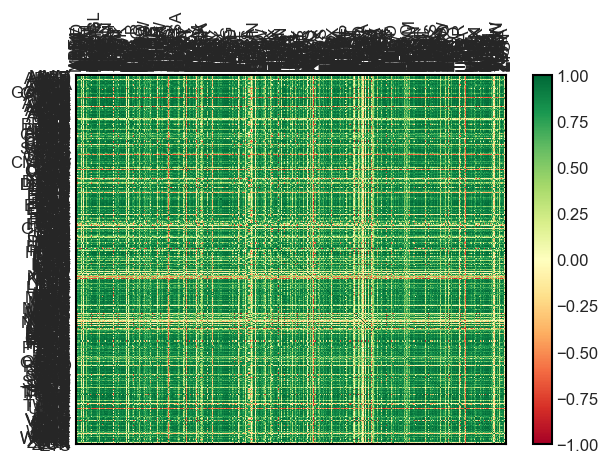

In [ ]:
# Part 8: Correlation Tables & Data Visualization
# Visualizing data from the SP500 close price csv 
def visualize_data():
    df = pd.read_csv('sp500_joined_closes.csv')

# Example of plotting one company close price over time for Apple (ticker = AAPL) 
#    df['AAPL'].plot()
#    plt.show()

# Create correlation table for all data in df for SP500 close price
    df_corr = df.corr()
    print(df_corr.head())
# Visualize inner values of dataframe (numpy array of columns and rows)
# Specify figure and define axes using parameters(111) : one subplot is 1x1 for plot 1)
    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

# Define heatmap using a range from red to yellow to green
# Red = Negative, Yellow = Neutral, Green = Positive
# Colorbar for legend
    heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
    fig.colorbar(heatmap)
# Build graph
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor = False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor = False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    column_labels = df_corr.columns
    row_labels = df_corr.index
# Make x labels vertical, set limit of colors (-1 = min, 1 = max)
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation = 90)
    heatmap.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()
visualize_data()

# Next create features/labels, use ML for trading strategy & possible investments.	

In [ ]:
# Part 9: Preprocessing Data for Machine Learning (ML) Model
# Part 10: Setting Target
# Part 11: Generate Labels

# svm = support-vector machine
# Cross validation to shuffle data and create training & testing samples  
# Voting classifier - use many classifiers, let them voite on best classifier

# For tutorials on Practical Machine Learning with Python visit: /
# https://pythonprogramming.net/machine-learning-tutorial-python-introduction/

# Machine Learnings: Preprocess Data for Trading Strategy

# Disclaimer: This script is for educational purposes only.
# To build more accurate ML models, you might focus on specific time frames (i.e. 1-2 yrs)
# Further, you might need more data.
# We use one-day data because it is available for free.

In [ ]:
# Create features/labels, use ML for trading strategy & possible investments.	
# Theory: groups of companies might move up/down together (using pricing data).
# Take S&P500 dataset (closing price over time, 2000-2020), use machine learning.
# Normalize dataset by converting pricing data to % change
# Features = define, labels = target
# Labels = Buy, Sell, or Hold

# Take feature data and determine label by asking:
# "Within next 7 trading days did price go up more than x% (i.e. 2%)?"
# If yes, sell company.
# If no, hold company.

# Each model generated per company
# Each company model considers pricing data from entire SP500 dataset
# To look further into the future, i.e. 30 days, change to "hm_days = 30:
def process_data_for_labels(ticker):
    hm_days = 7
    fileDataSet = pd.read_csv('sp500_joined_closes.csv', index_col = 0)
    tickers = fileDataSet.columns.values.tolist()
    fileDataSet.fillna(0, inplace = True)

# Preprocessing Data for ML

# The range will go up to a certain point (for 7 days)  
# Create custom dataset to predict future values based on percentage change
# Value in percent change = price in two days from now
# less today's price, divided by today's price, multiplied by 100.
    for i in range(1, hm_days+1):
        fileDataSet['{}d'.format(ticker, i)] = (fileDataSet[ticker].shift(-i) - fileDataSet[ticker]) / fileDataSet[ticker]

    fileDataSet.fillna(0, inplace = True)
    return tickers, fileDataSet

# Here we look at " " company (ticker = " ")
process_data_for_labels('BAC')

(['MMM',
  'ABT',
  'ABBV',
  'ABMD',
  'ACN',
  'ATVI',
  'ADBE',
  'AMD',
  'AAP',
  'AES',
  'AFL',
  'A',
  'APD',
  'AKAM',
  'ALK',
  'ALB',
  'ARE',
  'ALXN',
  'ALGN',
  'ALLE',
  'LNT',
  'ALL',
  'GOOGL',
  'GOOG',
  'MO',
  'AMZN',
  'AMCR',
  'AEE',
  'AAL',
  'AEP',
  'AXP',
  'AIG',
  'AMT',
  'AWK',
  'AMP',
  'ABC',
  'AME',
  'AMGN',
  'APH',
  'ADI',
  'ANSS',
  'ANTM',
  'AON',
  'AOS',
  'APA',
  'AIV',
  'AAPL',
  'AMAT',
  'APTV',
  'ADM',
  'ANET',
  'AJG',
  'AIZ',
  'T',
  'ATO',
  'ADSK',
  'ADP',
  'AZO',
  'AVB',
  'AVY',
  'BKR',
  'BLL',
  'BAC',
  'BK',
  'BAX',
  'BDX',
  'BRK.B',
  'BBY',
  'BIO',
  'BIIB',
  'BLK',
  'BA',
  'BKNG',
  'BWA',
  'BXP',
  'BSX',
  'BMY',
  'AVGO',
  'BR',
  'BF.B',
  'CHRW',
  'COG',
  'CDNS',
  'CPB',
  'COF',
  'CAH',
  'KMX',
  'CCL',
  'CARR',
  'CAT',
  'CBOE',
  'CBRE',
  'CDW',
  'CE',
  'CNC',
  'CNP',
  'CTL',
  'CERN',
  'CF',
  'SCHW',
  'CHTR',
  'CVX',
  'CMG',
  'CB',
  'CHD',
  'CI',
  'CINF',
  'CTAS',
  '

In [ ]:
# Next, generate labels for targets using machine learning for investing with Python
# Based on percent change pricing information, should we buy, sell, or hold company?

# See mapping functions tutorials at https://pythonprogramming.net/python-function-mapping-pandas/
# Args and kwargs tutorials at https://pythonprogramming.net/args-kwargs-intermediate-python-tutorial/

# We will also back-test out strategy.
# Example here using percent change = 2% in a week.
# If company stock price changes by 2% in 7 days get out of position for that company.
# 0 = hold, -1 = sell, +1 = buy
# If data is inbalanced you can adjust the algorithm for higher accuracy
# Aiming for > 33% accuracy (for this example)
# Example if you are incorrect on the hold, did not think it would change more than 2%, but it did...
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

In [ ]:
# Part 11 ML Labels
# Map the function above to a column
def extract_featuresets(ticker):
    tickers, fileDataSet = process_data_for_labels(ticker)

# Define new column, value = mapped function using arg
# Arg = 7-day & change for future price; Pass paramters to function
# Generate labels for buy, sell, or hold
    fileDataSet['{}_target'.format(ticker)] = list(map(buy_sell_hold, fileDataSet[[c for c in fileDataSet.columns if c not in tickers]].values))

    vals = fileDataSet['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:', Counter(str_vals))
    
# List of options
    fileDataSet.fillna(0, inplace = True)
    fileDataSet = fileDataSet.replace([np.inf, -np.inf], np.nan)
    fileDataSet.dropna(inplace = True)

# Normalizing data set for ticker (prices) by using percent change.
    fileDataSet_vals = fileDataSet[[ticker_name for ticker_name in tickers]].pct_change()
    fileDataSet_vals = fileDataSet_vals.replace([np.inf, -np.inf], 0)
    fileDataSet_vals.fillna(0, inplace = True)

    X = fileDataSet_vals.values
    y = fileDataSet['{}_target'.format(ticker)].values

    return X, y, fileDataSet

extract_featuresets('BAC')

Data spread: Counter({'0': 2026, '1': 1701, '-1': 1403})


(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.0397349 , -0.0285716 ,  0.        , ...,  0.        ,
         -0.04842362,  0.        ],
        [ 0.02896518, -0.00183788,  0.        , ...,  0.        ,
         -0.00118324,  0.        ],
        ...,
        [ 0.00876118,  0.02119695, -0.00010959, ...,  0.0213796 ,
          0.06502401, -0.0074438 ],
        [-0.0161932 ,  0.00333004,  0.02006793, ..., -0.0363349 ,
         -0.01253218, -0.02257383],
        [ 0.00432072,  0.01194824, -0.00989033, ...,  0.01147542,
         -0.01757237, -0.00168803]]),
 array([-1,  1,  1, ...,  0,  0,  0], dtype=int64),
                    MMM        ABT       ABBV        ABMD         ACN  \
 Date                                                                   
 2000-01-03   28.311874   6.564564   0.000000   18.250000    0.000000   
 2000-01-04   27.186905   6.377004   0.000000   17.812500    0.000000   
 2000-01-05   27.974379   6.3

In [ ]:
# Create new Machine Learning function
# Create training and testing, 25% sample data will be tested against for accuracy

# Create classifier, define
# X_train is (fileDataset_vals, above) the percent change data for all companies, including company testing for
# y is the target classification (0 = hold, 1 = buy, -1 = sell)
# Use classifier that will fit input data to target 
# clf = neighbors.KNeighborsClassifier()
#
#    clf.fit(X_train, y_train)
#    confidence = clf.score(X_test, y_test)
#    print('Accuracy', confidence)

# Going forward, if you train and do not wish to retrain this model (above) pickle the classifier
# Load the pickle file, clf.predict will run and return list of predictions
# predictions = clf.predict(X_test)
# print('Predicted spread:', Counter(predictions))
#
# print('Confidence:', Counter(confidence))   
#    return confidence

# Here we are looking at Bank of America (ticker = BAC)
# do_ml('BAC')

# Example Output: 0 = hold, -1 = sell, 1 = buy (for BAC we had more holds, followed by sells and least for buys)
# Data spread: Counter({'0': 2558, '1': 1462, '-1': 1110})
# Data spread: Counter({'0': 2026, '1': 1701, '-1': 1403})
# Accuracy 0.38347622759158223
# Predicted spread: Counter({0: 758, -1: 318, 1: 207})

In [ ]:
# Part 12: ML Algorithm with Voting Classifier 
# Repeat above using Voting Classifier
def do_ml(ticker):
    X, y, fileDataSet = extract_featuresets(ticker)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    #clf = neighbors.KNeighborsClassifier()
# Replace simple classifier with voting classifier:
# Voting classifier will take list of tuples of classifier by name, classifier
# List contains tuples (i.e. 3 classifiers: linear svc, neigbors, random forest classifiers) 
    #clf = VotingClassifier([('lsvc', svm.LinearSVC()),
    clf = VotingClassifier([('lsvc', LinearSVC()), 
                            ('knn', neighbors.KNeighborsClassifier()),
                            ('rfor', RandomForestClassifier())])

    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('Accuracy', confidence)
    predictions = clf.predict(X_test)
    print('Predicted spread:', Counter(predictions))

    return confidence

do_ml('BAC')

Data spread: Counter({'0': 2026, '1': 1701, '-1': 1403})


C:\Users\JCW\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy 0.4224473889321902
Predicted spread: Counter({0: 802, 1: 260, -1: 221})


0.4224473889321902

In [ ]:
# STOCK MARKET DATA VISUALIZATIONS
# Loading data into dataframe:
datafile = 'MSFT.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]


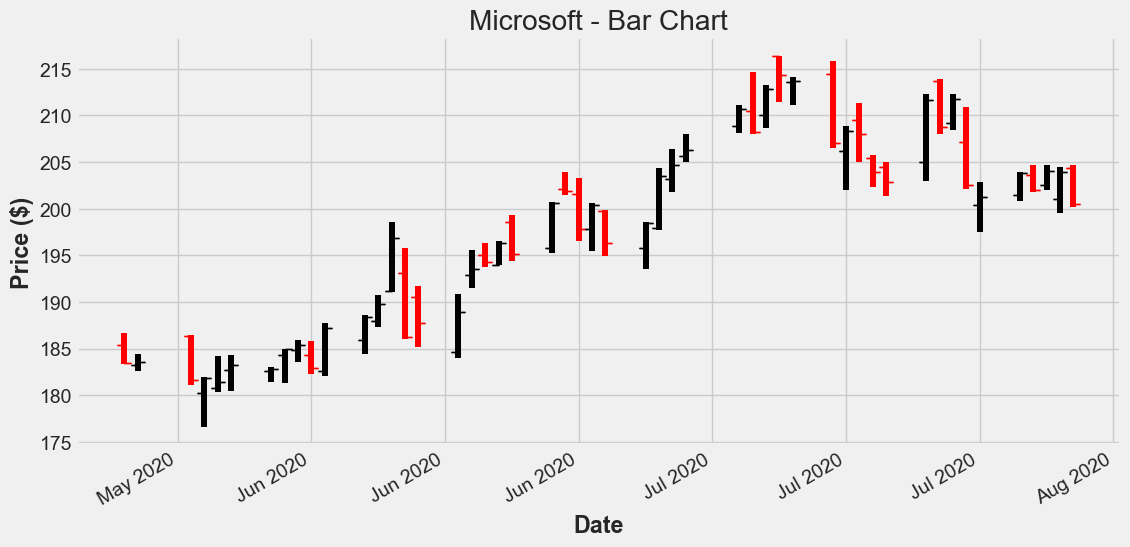

In [ ]:
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Microsoft - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

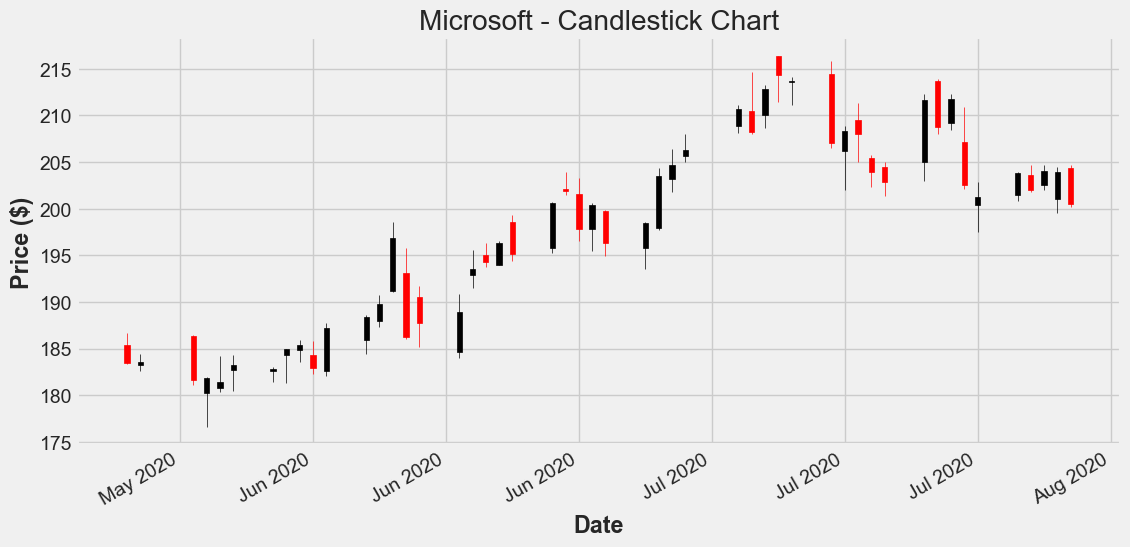

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Microsoft - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

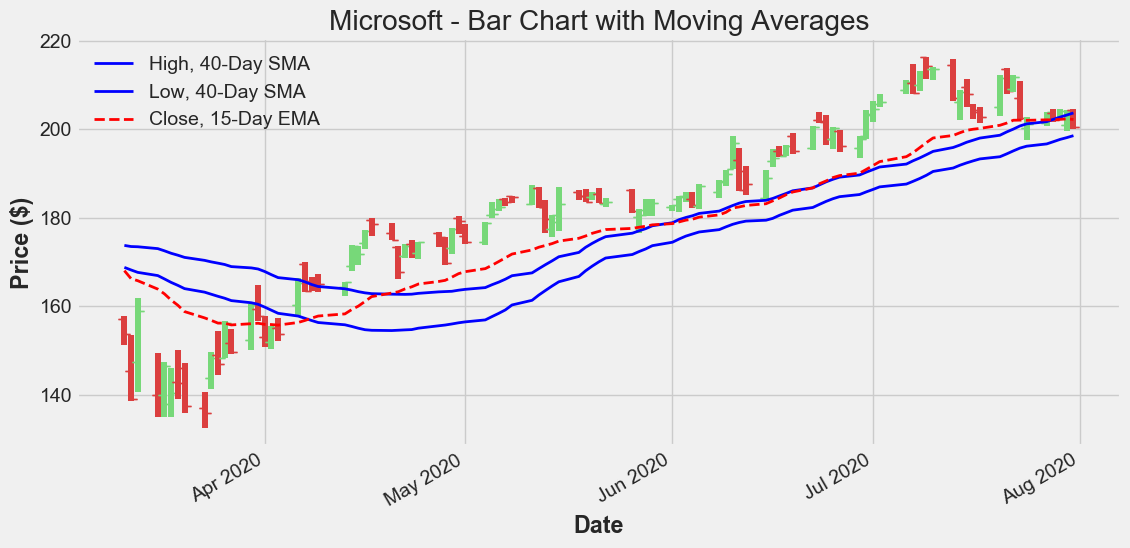

In [ ]:
# Loading data into dataframe for Microsoft (ticker = MSFT):
datafile = 'msft.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Microsoft - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


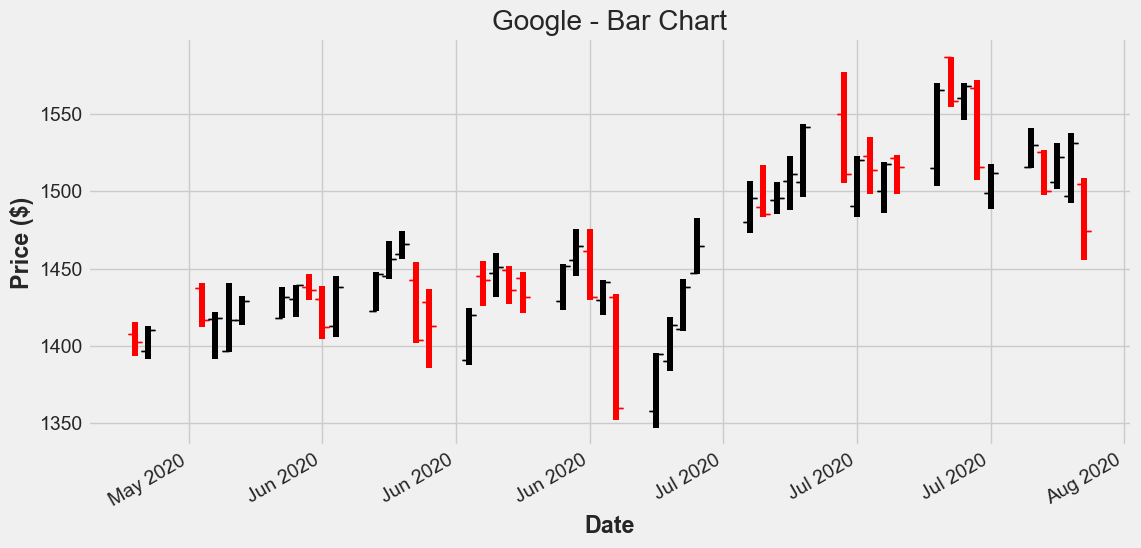

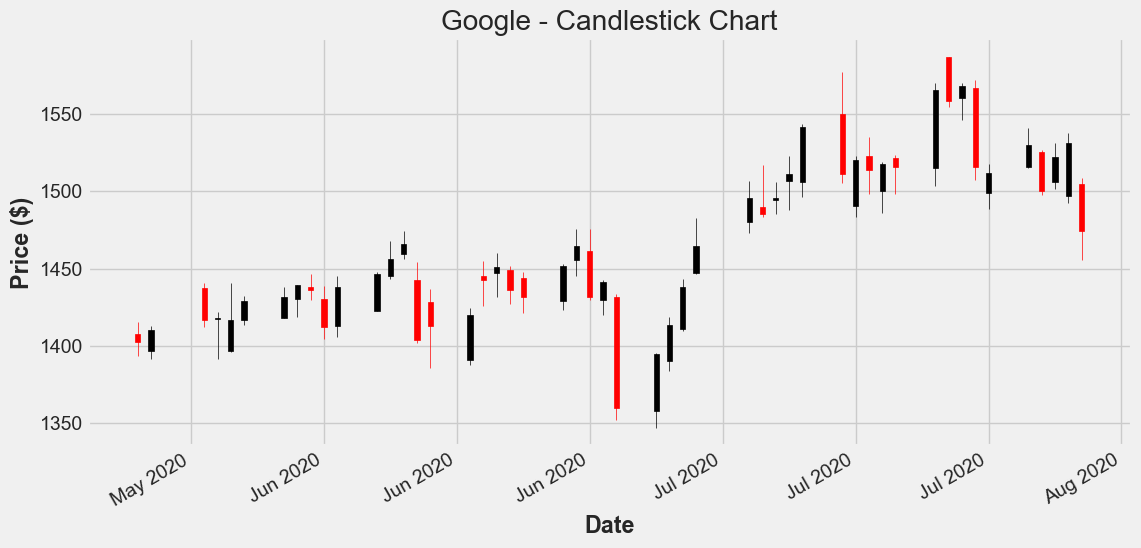

In [ ]:
# Loading data into dataframe for Google (ticker = GOOG):
df = web.DataReader('GOOG', 'yahoo', start, end)
df.to_csv('goog.csv')
df = pd.read_csv('goog.csv', parse_dates = True, index_col = 'Date')

datafile = 'goog.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Google - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Google - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

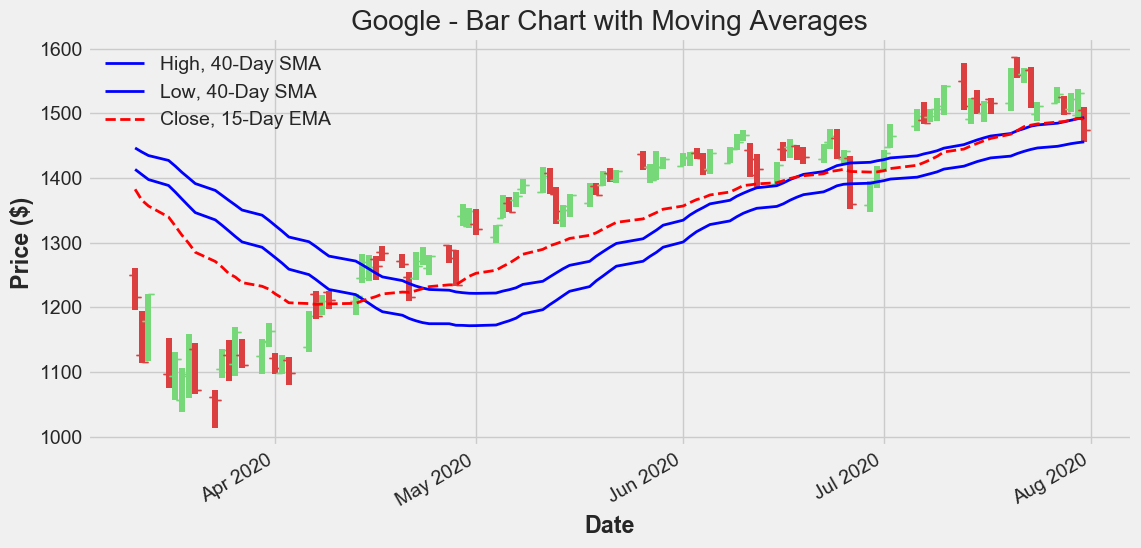

In [ ]:
# Loading data into dataframe for Google (ticker = GOOG):
datafile = 'goog.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Google - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


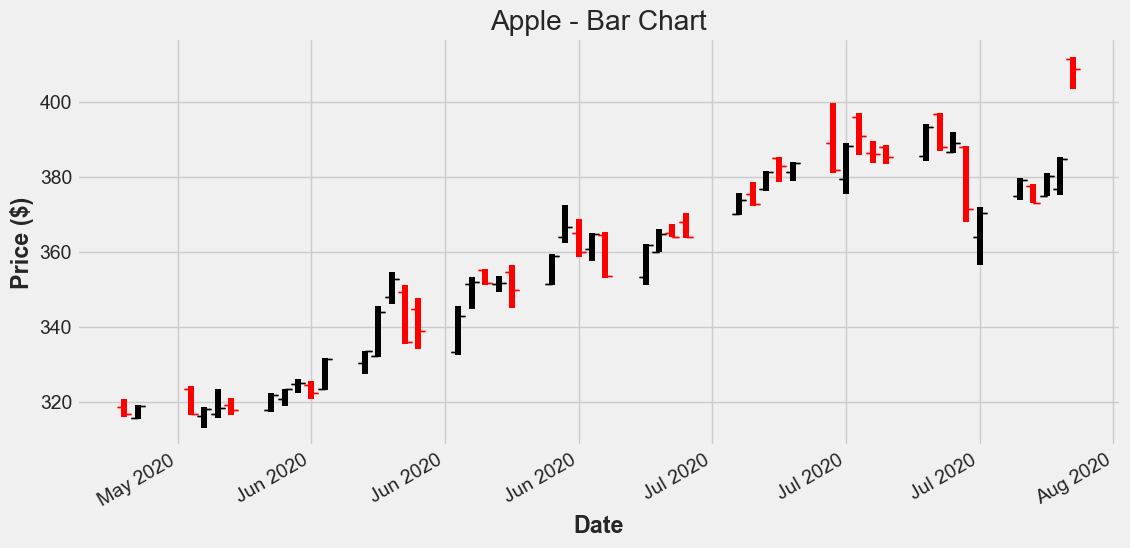

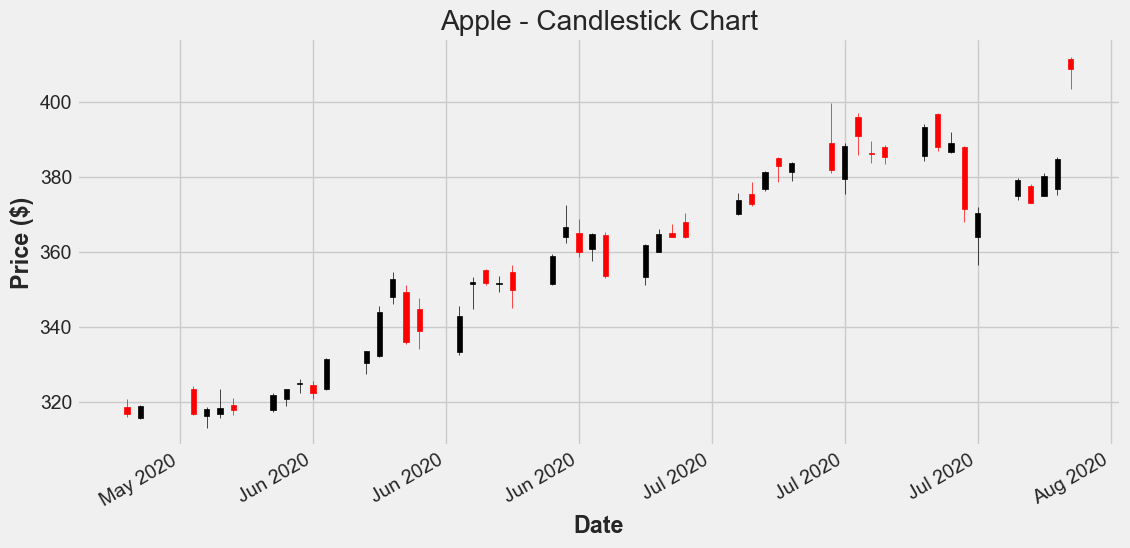

In [ ]:
# Loading data into dataframe for Apple (ticker = AAPL):
df = web.DataReader('AAPL', 'yahoo', start, end)
df.to_csv('aapl.csv')
df = pd.read_csv('aapl.csv', parse_dates = True, index_col = 'Date')

datafile = 'aapl.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Apple - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Apple - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

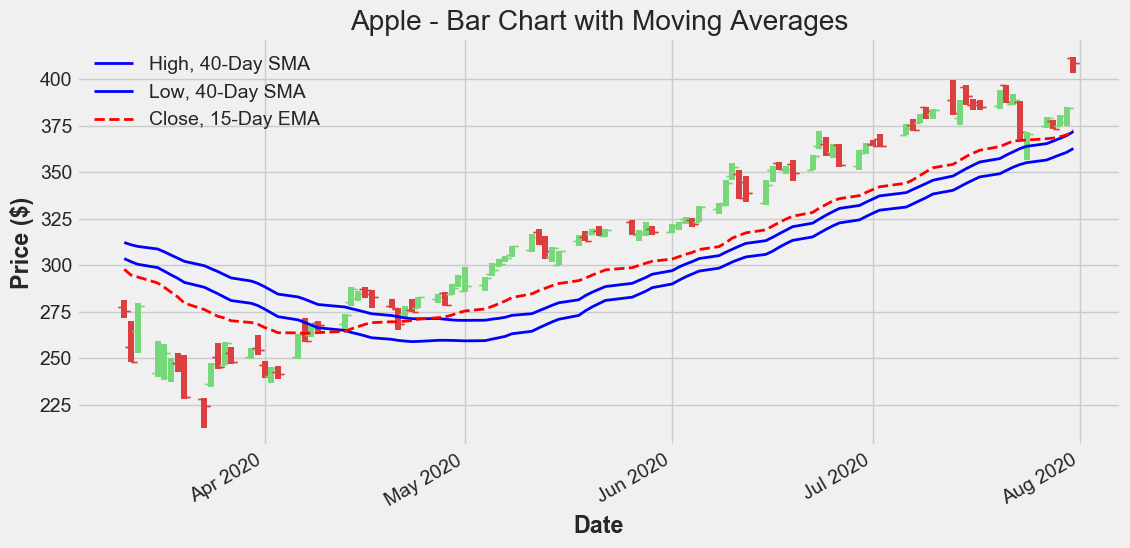

In [ ]:
# Loading data into dataframe for Apple (ticker = AAPL):
datafile = 'aapl.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Apple - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


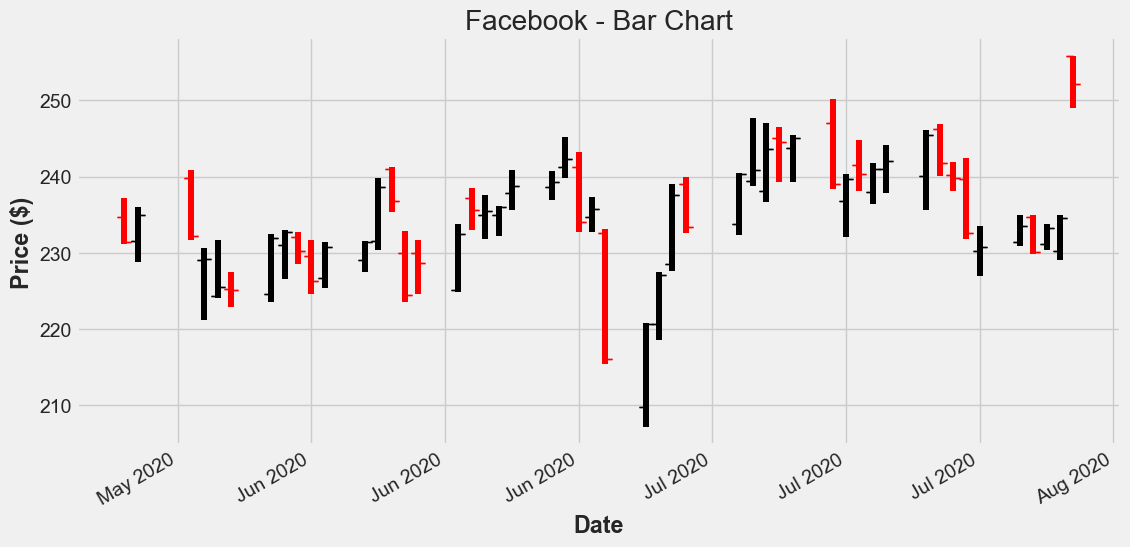

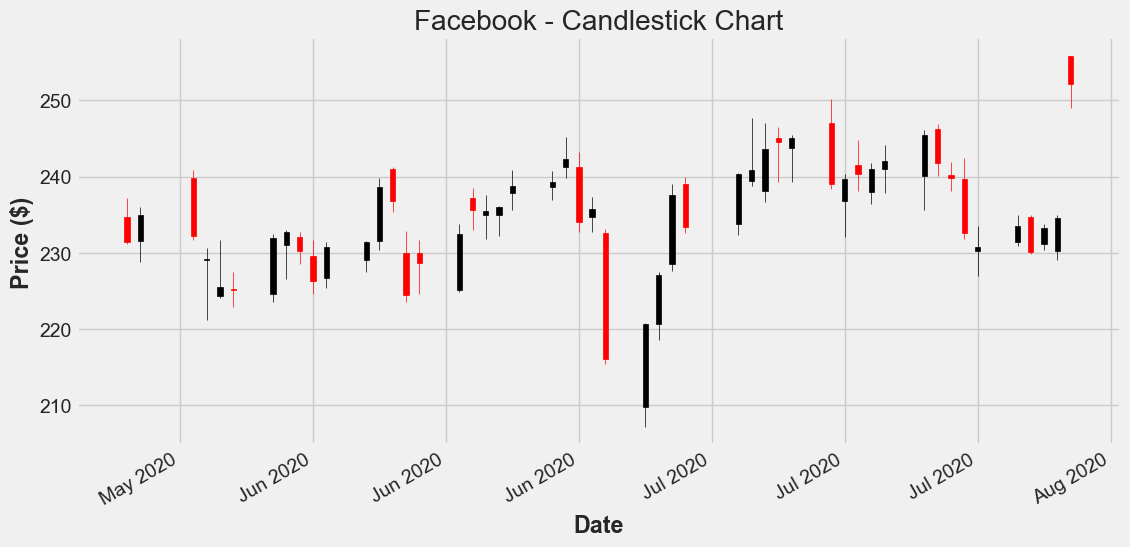

In [ ]:
# Loading data into dataframe for Facebook (ticker = FB):
df = web.DataReader('FB', 'yahoo', start, end)
df.to_csv('fb.csv')
df = pd.read_csv('fb.csv', parse_dates = True, index_col = 'Date')

datafile = 'fb.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Facebook - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Facebook - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

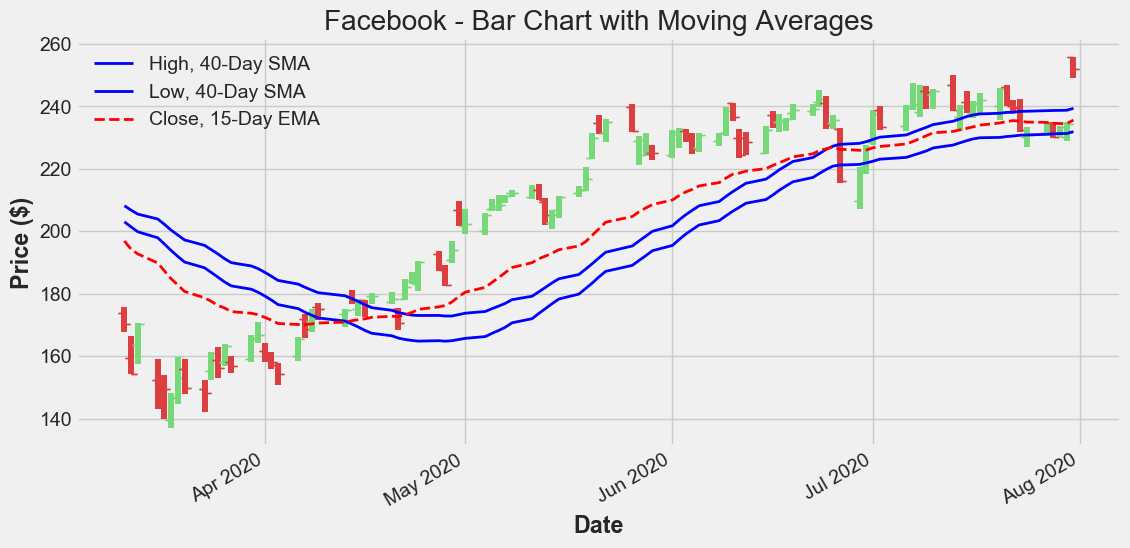

In [ ]:
# Loading data into dataframe for Facebook (ticker = FB):
datafile = 'fb.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Facebook - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

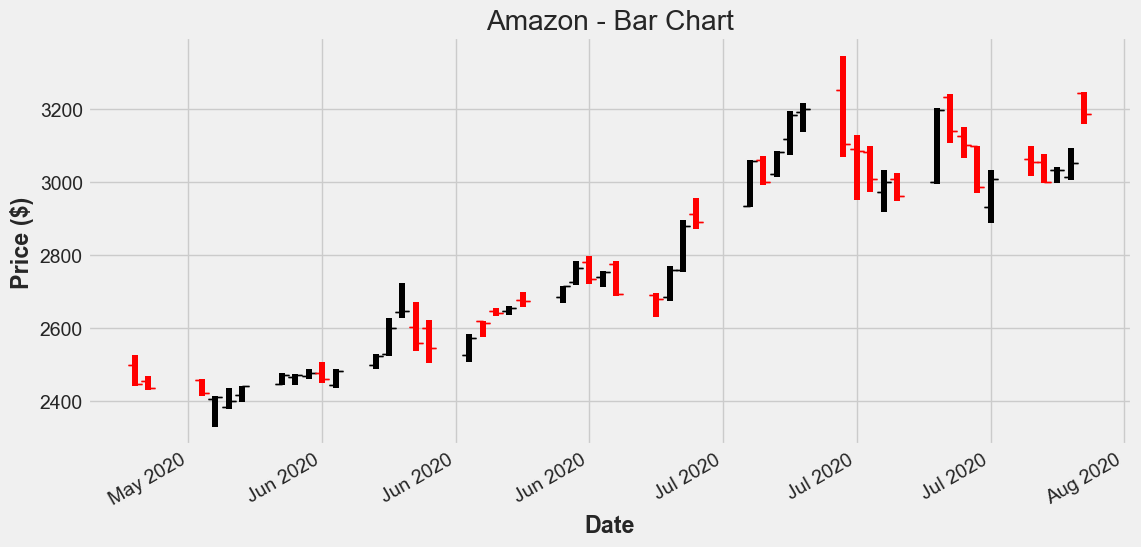

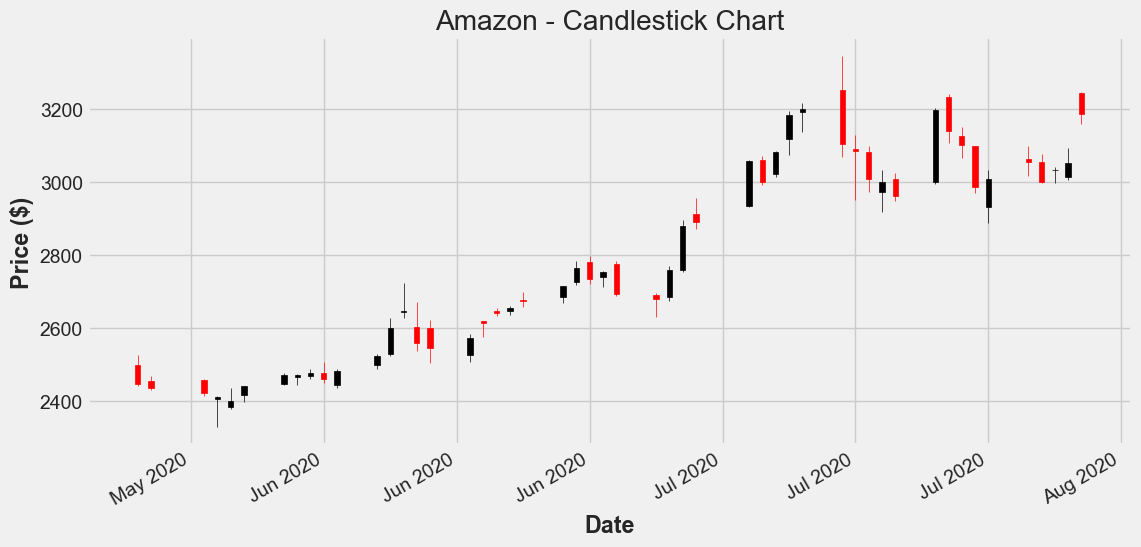

In [ ]:
# Loading data into dataframe for Amazon (ticker = AMZN):
df = web.DataReader('AMZN', 'yahoo', start, end)
df.to_csv('amzn.csv')
df = pd.read_csv('amzn.csv', parse_dates = True, index_col = 'Date')

datafile = 'amzn.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Amazon - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Amazon - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

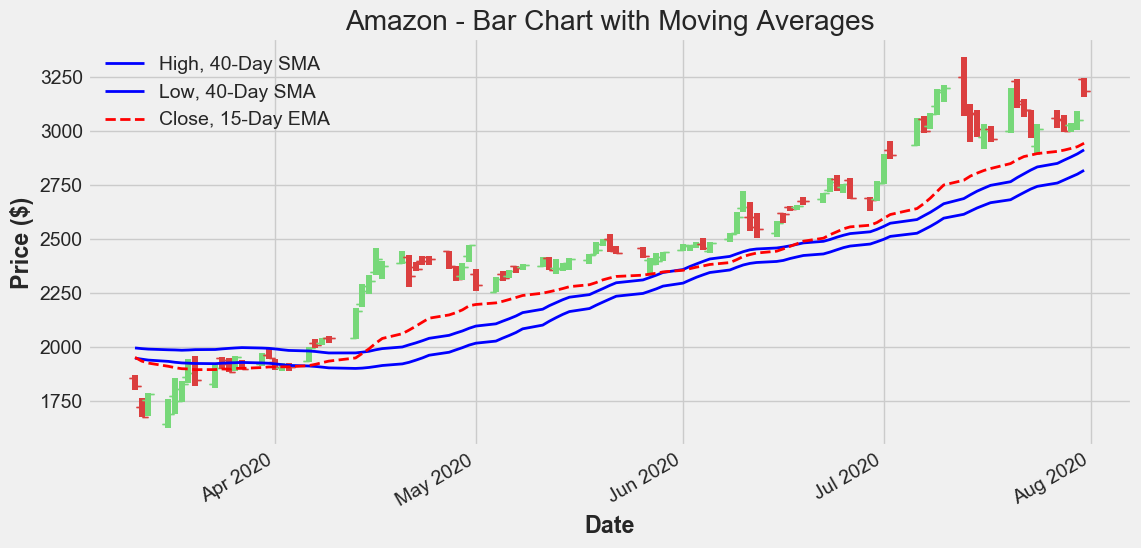

In [ ]:
# Loading data into dataframe:
datafile = 'amzn.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Amazon - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


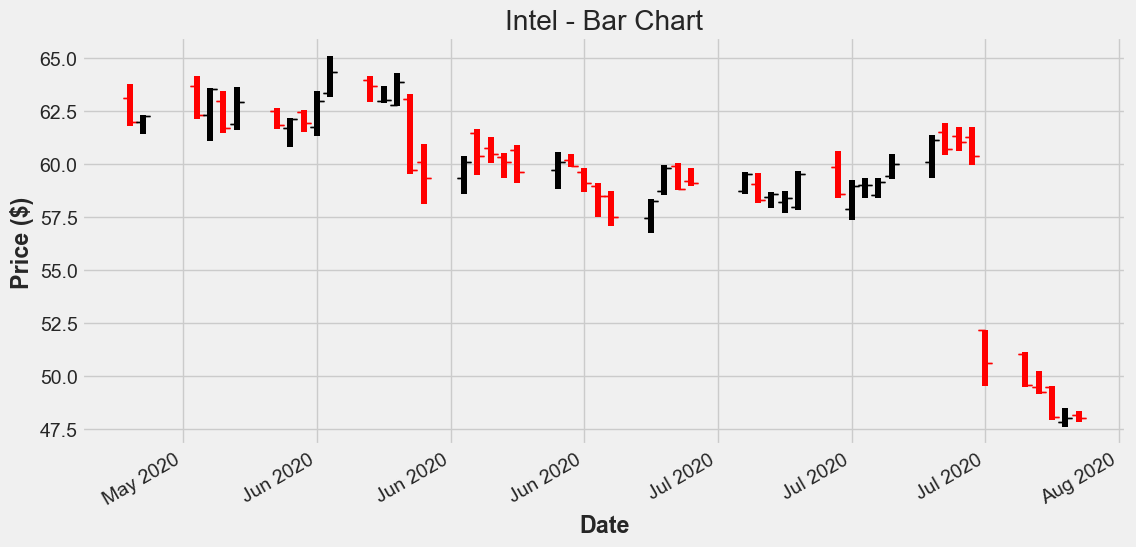

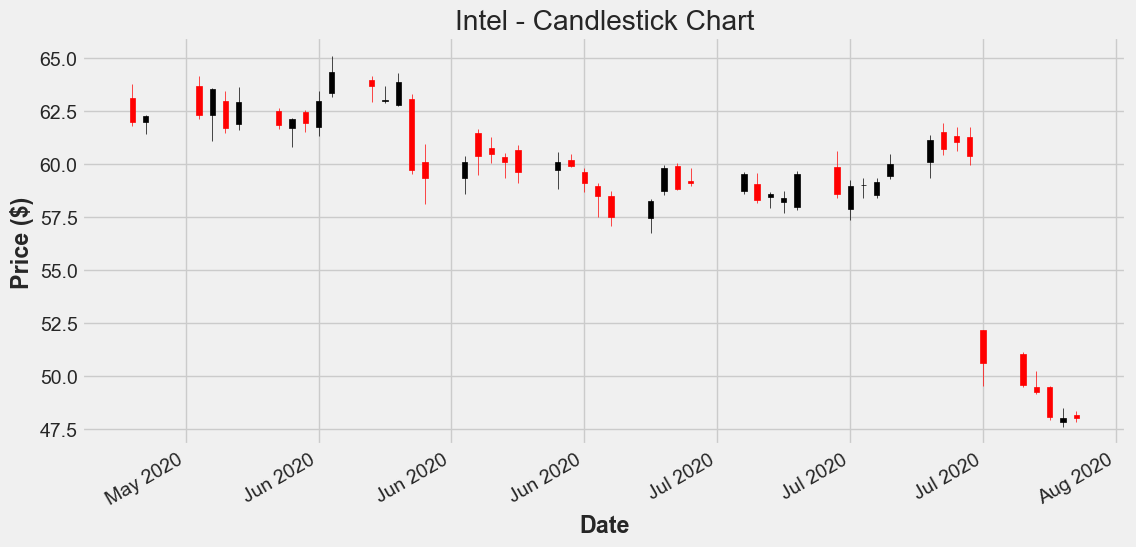

In [ ]:
# Loading data into dataframe for Intel (ticker = INTC):
df = web.DataReader('INTC', 'yahoo', start, end)
df.to_csv('intc.csv')
df = pd.read_csv('intc.csv', parse_dates = True, index_col = 'Date')

datafile = 'intc.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Intel - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Intel - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

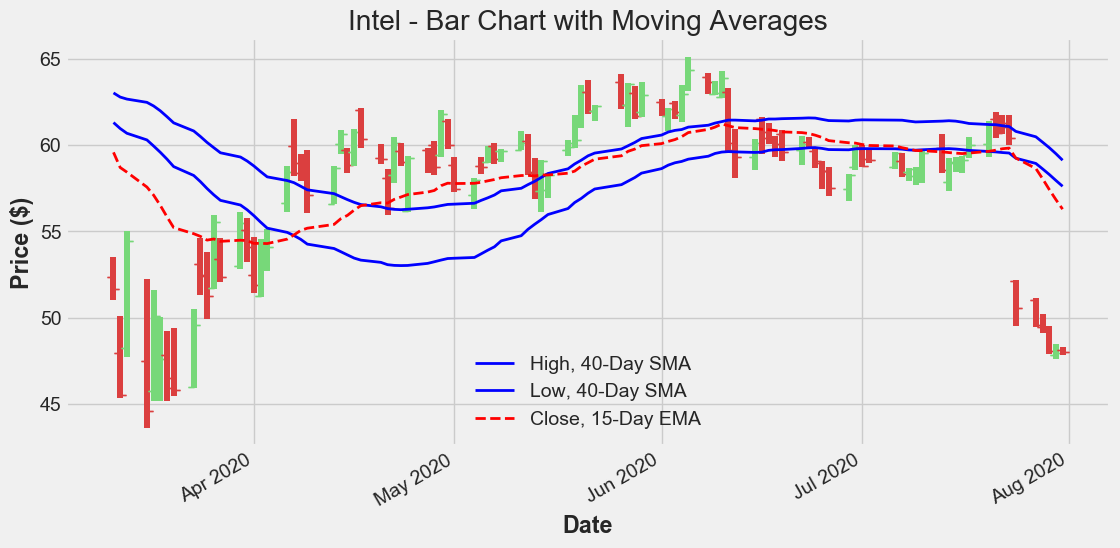

In [ ]:
# Loading data into dataframe:
datafile = 'intc.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Intel - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

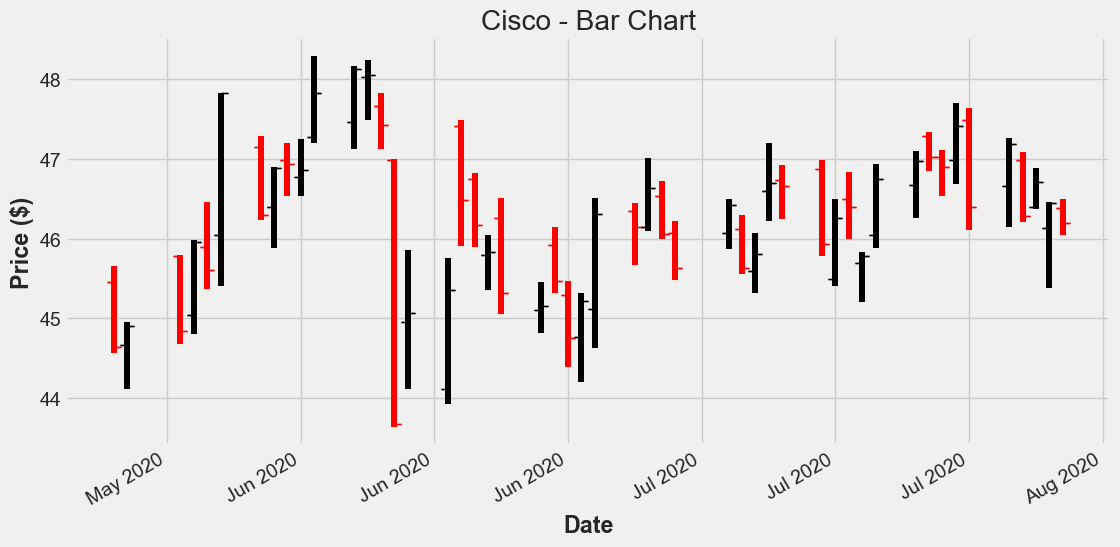

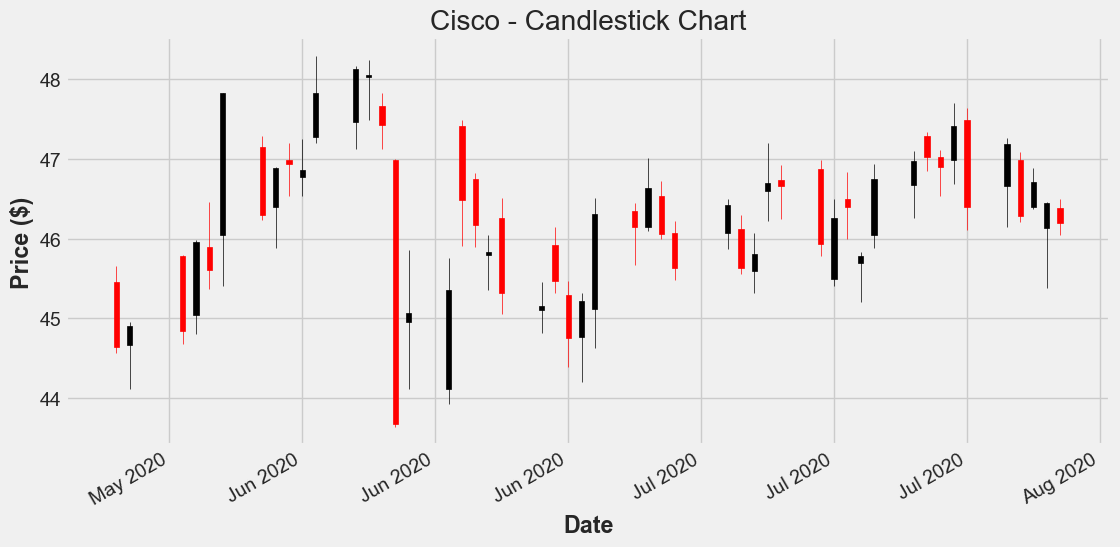

In [ ]:
# Loading data into dataframe for Cisco (ticker = CSCO):
df = web.DataReader('CSCO', 'yahoo', start, end)
df.to_csv('csco.csv')
df = pd.read_csv('csco.csv', parse_dates = True, index_col = 'Date')

datafile = 'csco.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Cisco - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Cisco - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

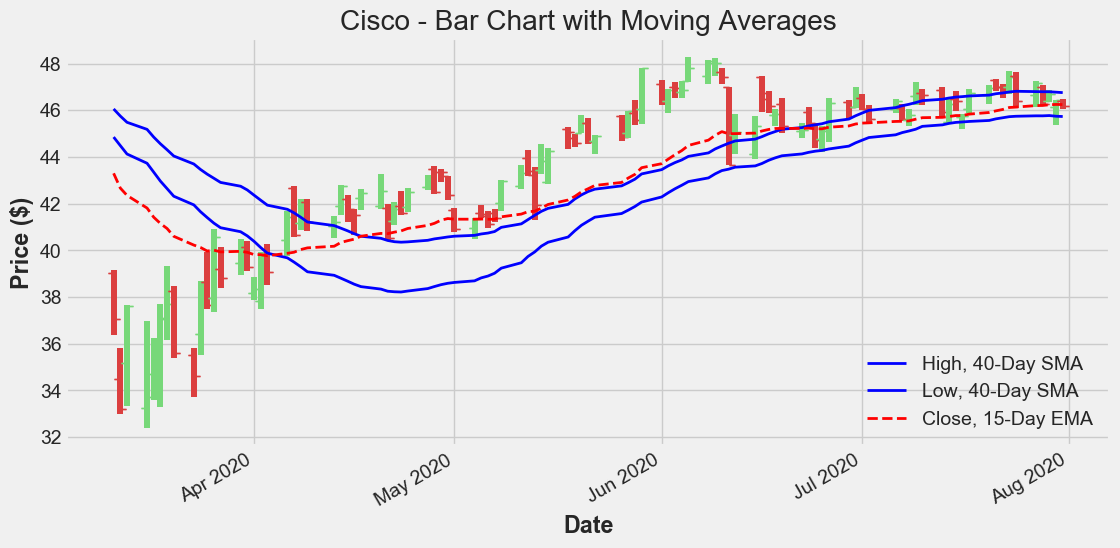

In [ ]:
# Loading data into dataframe - Cisco (CSCO):
datafile = 'csco.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Cisco - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


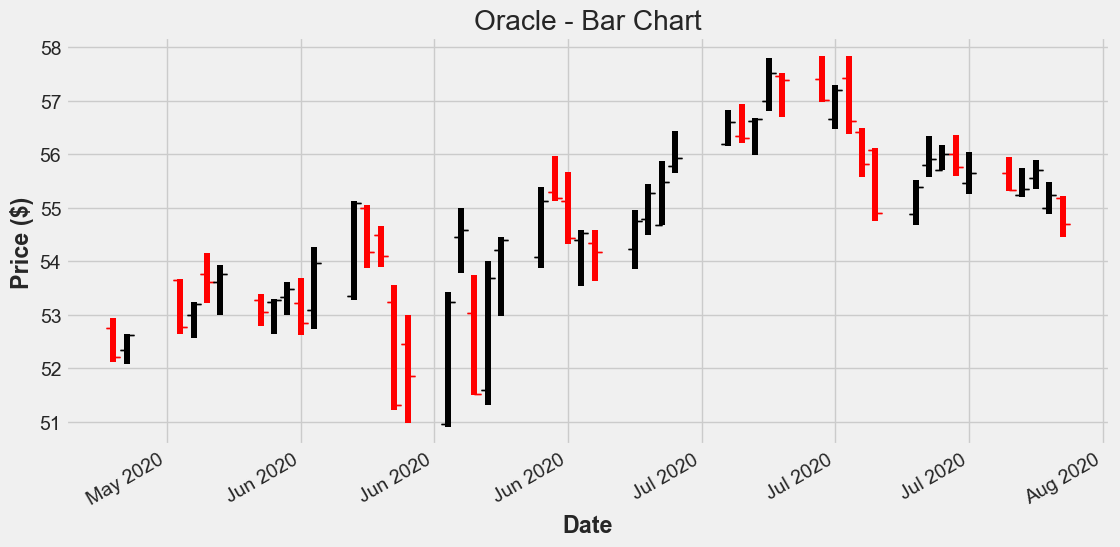

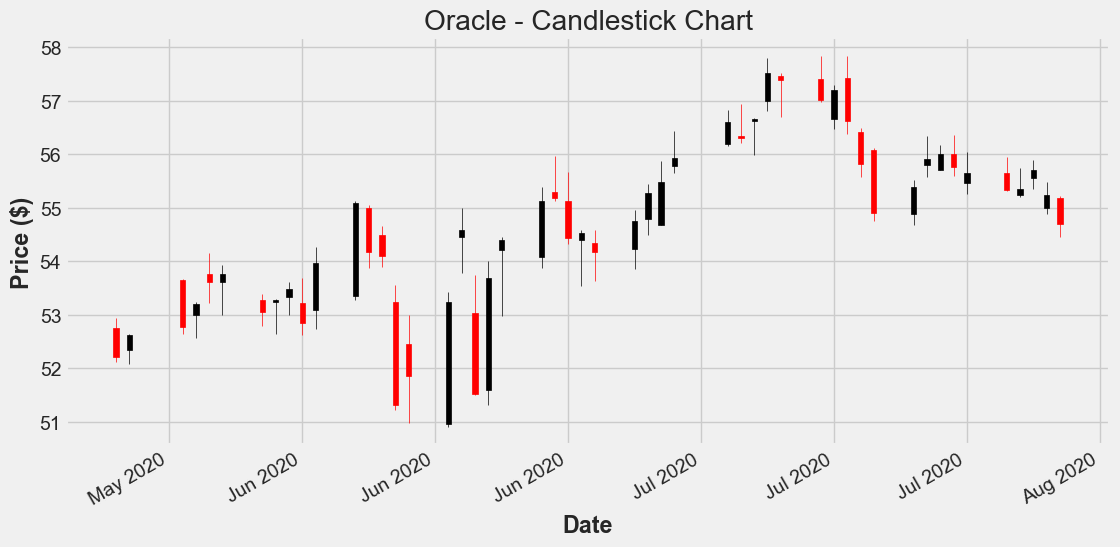

In [ ]:
# Loading data into dataframe for Oracle (ticker = ORCL):
df = web.DataReader('ORCL', 'yahoo', start, end)
df.to_csv('orcl.csv')
df = pd.read_csv('orcl.csv', parse_dates = True, index_col = 'Date')

datafile = 'orcl.csv'
data = pd.read_csv(datafile, index_col = 'Date')

datafile = 'orcl.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Oracle - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Oracle - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

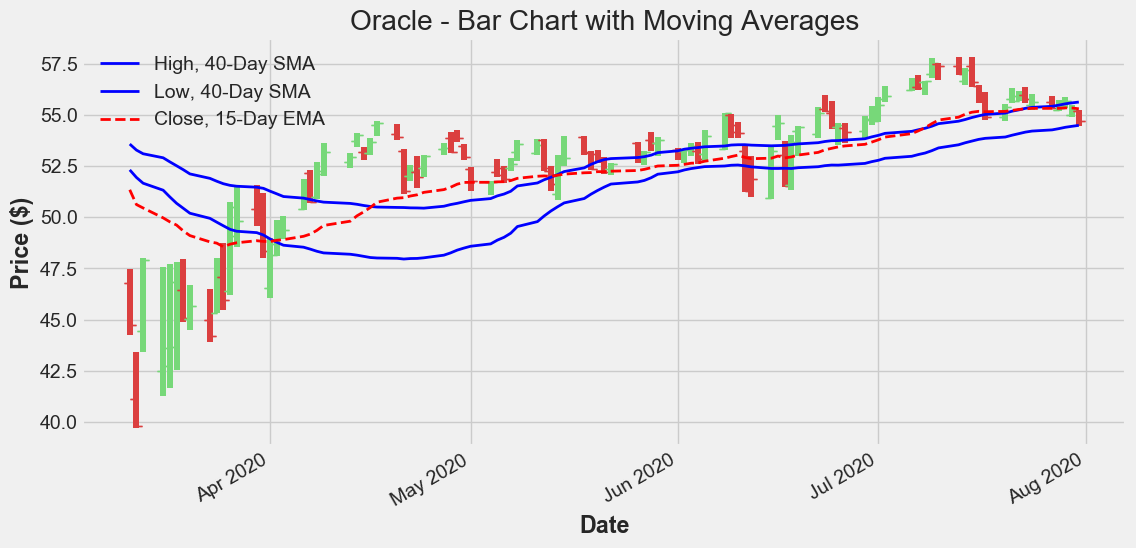

In [ ]:
# Loading data into dataframe for Oracle (ticker = ORCL):
datafile = 'orcl.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Oracle - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

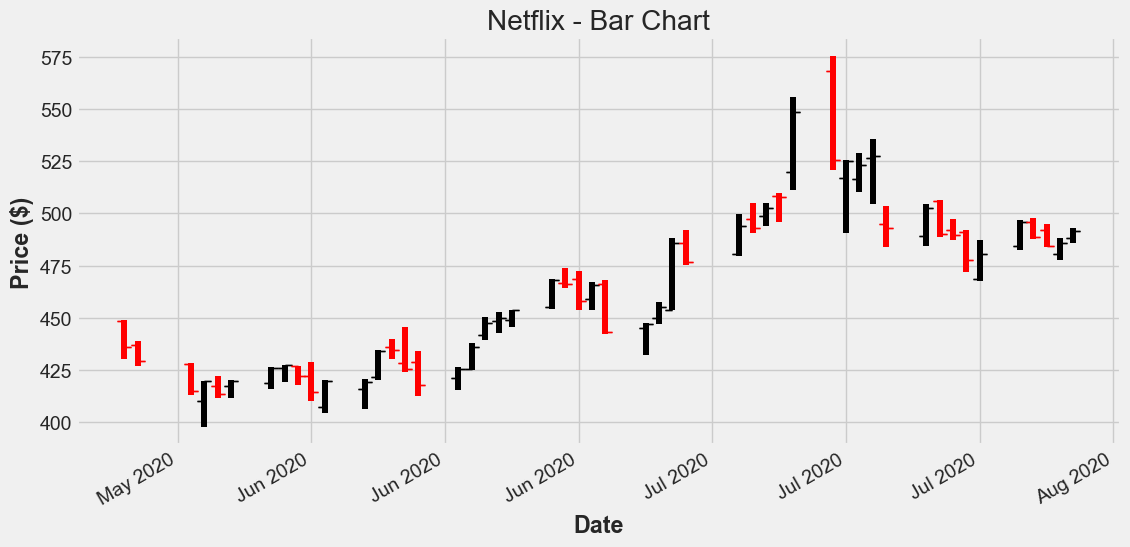

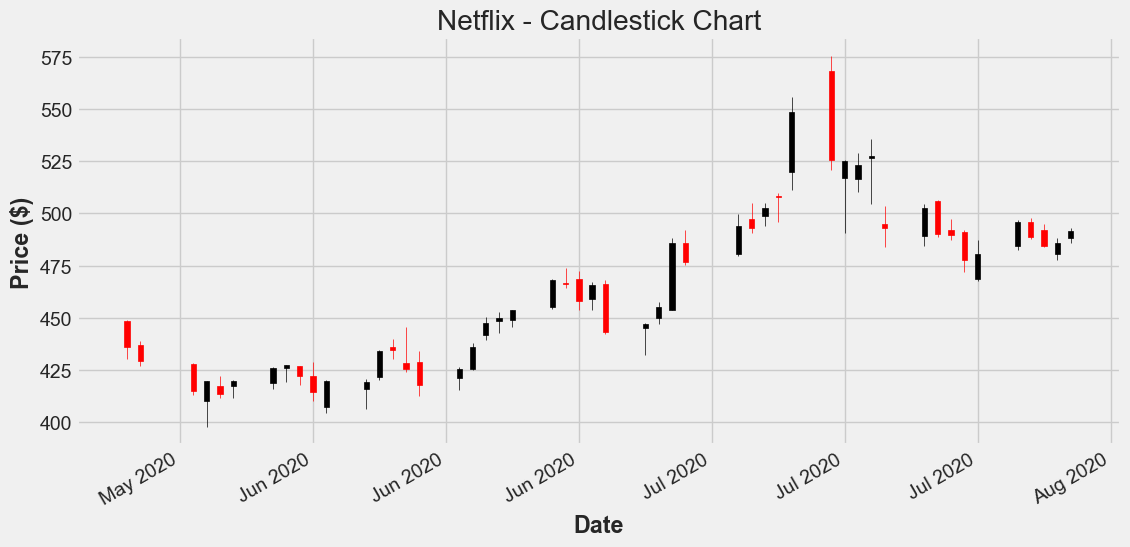

In [ ]:
# Loading data into dataframe for Netflix (ticker = NFLX):
df = web.DataReader('NFLX', 'yahoo', start, end)
df.to_csv('nflx.csv')
df = pd.read_csv('nflx.csv', parse_dates = True, index_col = 'Date')

datafile = 'nflx.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Netflix - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Netflix - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

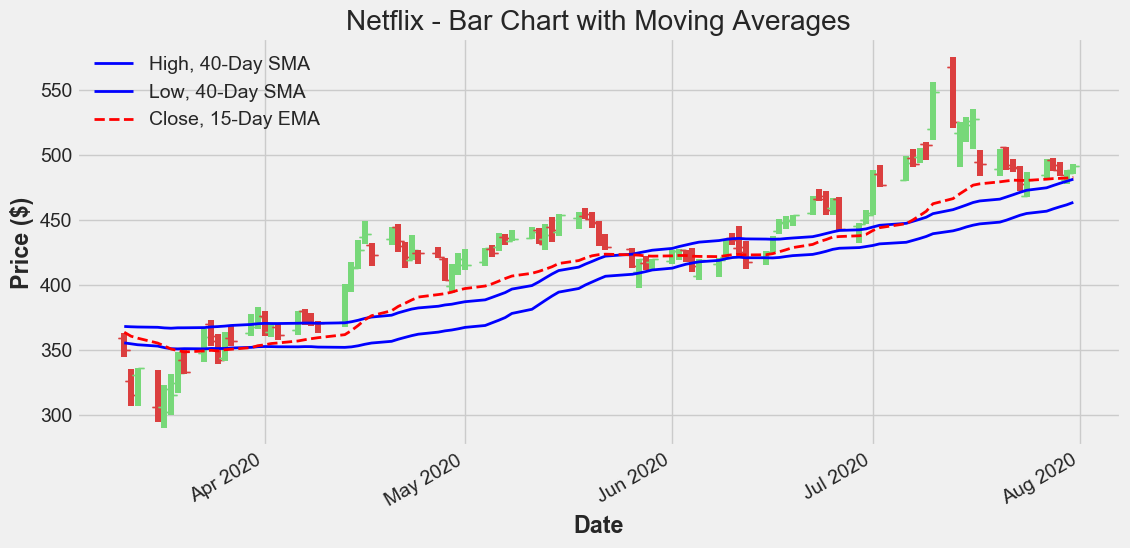

In [ ]:
# Loading data into dataframe for Netflix (ticker = NFLX):
datafile = 'nflx.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('Netflix - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


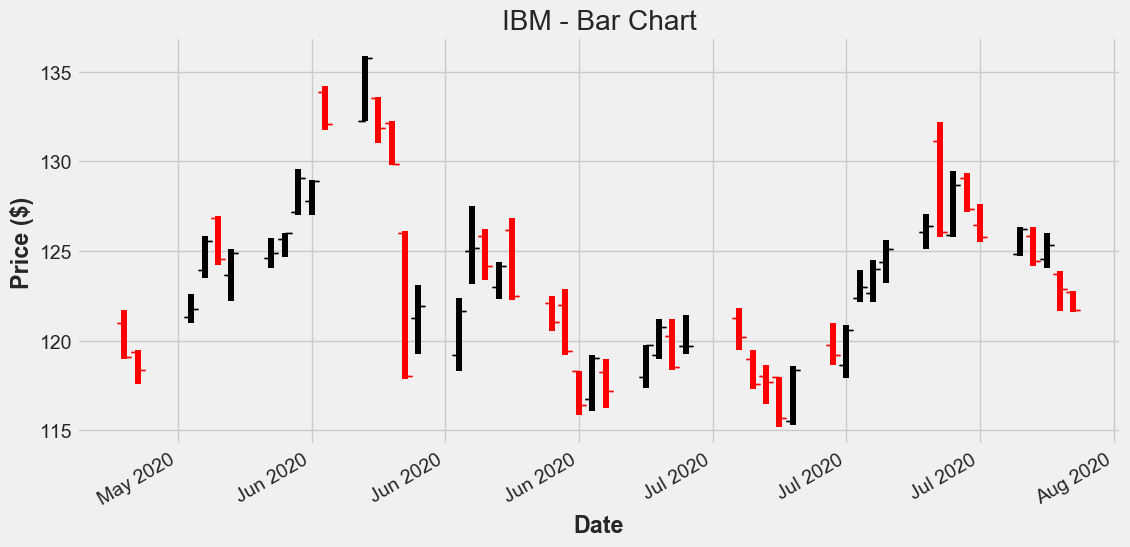

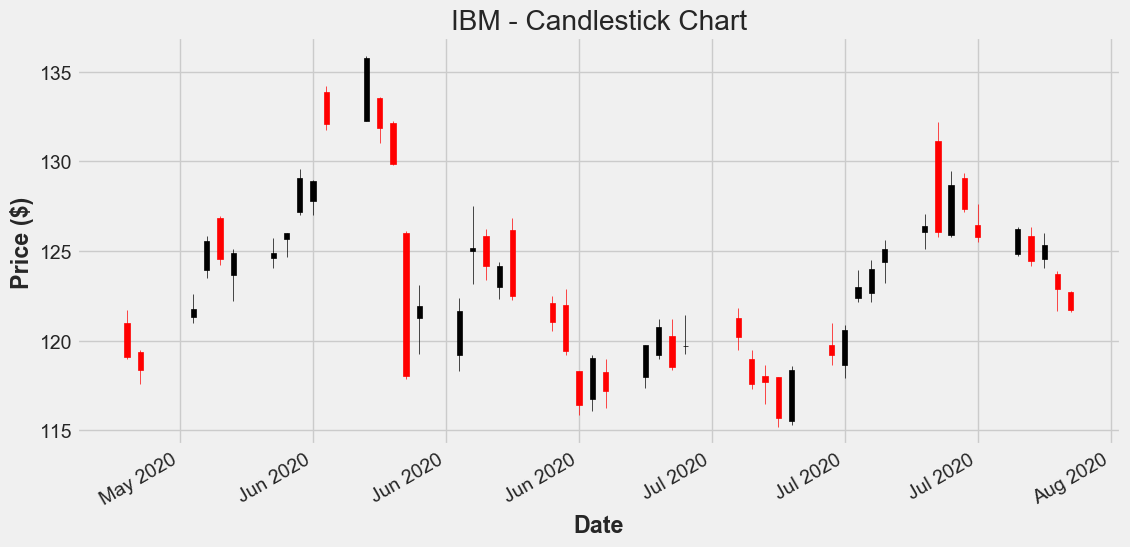

In [ ]:
# Loading data into dataframe for IBM (ticker = IBM):
df = web.DataReader('IBM', 'yahoo', start, end)
df.to_csv('ibm.csv')
df = pd.read_csv('ibm.csv', parse_dates = True, index_col = 'Date')

datafile = 'ibm.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)

# We need to exctract the OHLC prices into a list of lists:
dvalues = data[['Open', 'High', 'Low', 'Close']].values.tolist()

# Dates in our index column are in datetime format, we need to comvert them 
# to Matplotlib date format (see https://matplotlib.org/3.1.1/api/dates_api.html):
pdates = mdates.date2num(data.index)

# If dates in our index column are strings instead of datetime objects, we should use:
# pdates = mplf.dates.datestr2num(data.index)

# We prepare a list of lists where each single list is a [date, open, high, low, close] sequence:
ohlc = [ [pdates[i]] + dvalues[i] for i in range(len(pdates)) ]
# Pass ohlc matrix into mpl-finance to create candlestick chart:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-50:], ticksize = 5)

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('IBM - Bar Chart')

# Display dates as "Month Year":
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Automatically arrange data labels in a readable way:
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook
fig, ax = plt.subplots(figsize = (12,6))

mplf.candlestick_ohlc(ax, ohlc[-50:], width=0.4)
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('IBM - Candlestick Chart')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook

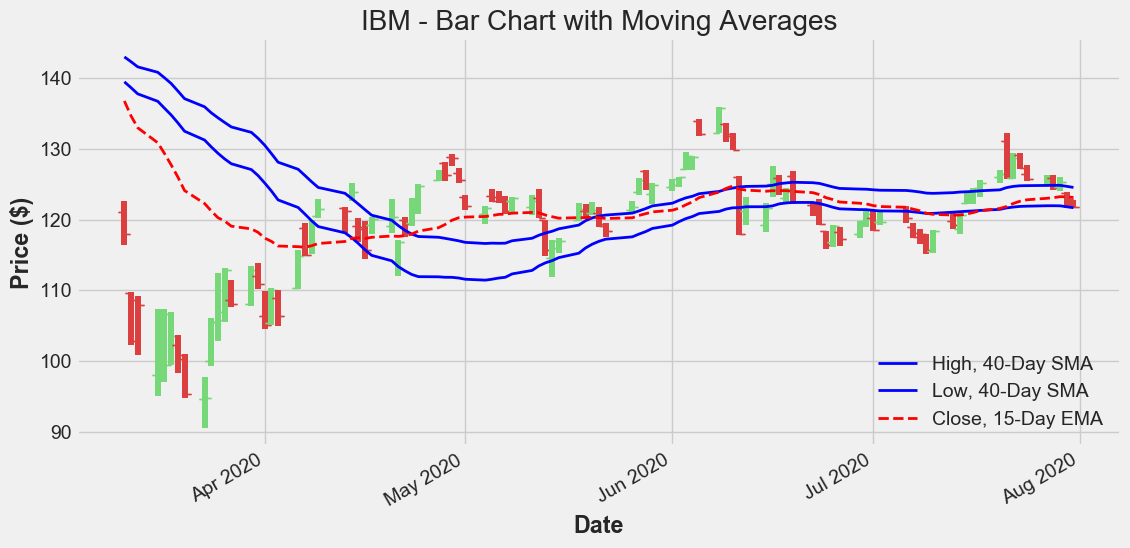

In [ ]:
# Loading data into dataframe for IBM (ticker = IBM):
datafile = 'ibm.csv'
data = pd.read_csv(datafile, index_col = 'Date')
# Converting the dates from string to datetime format:
data.index = pd.to_datetime(data.index)
hsma40 = data['High'].rolling(40).mean()
lsma40 = data['Low'].rolling(40).mean()
ema15 = data['Close'].ewm(15).mean()

fig, ax = plt.subplots(figsize = (12,6))

mplf.plot_day_summary_ohlc(ax, ohlc[-100:], ticksize = 4, colorup='#77d879', colordown='#db3f3f')
ax.plot(hsma40[-100:], color = 'blue', linewidth = 2, label='High, 40-Day SMA')
ax.plot(lsma40[-100:], color = 'blue', linewidth = 2, label='Low, 40-Day SMA')
ax.plot(ema15[-100:], color = 'red', linestyle='--', linewidth = 2, label='Close, 15-Day EMA')

ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
ax.set_title('IBM - Bar Chart with Moving Averages')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()

plt.show() # add this if you're not using Jupyter Notebook


In [ ]:
# Two simple moving averages (in blue) create channel:
# Compared to single moving average, 
# there is a gray zone when prices are neither above nor below the channel.
# One exmaple, would be to adopt trading rules such as:
# (1) Enter long positions (BUY) only when price bars completely above higher 40-Day SMA.
# (2) Enter short positions (SELL) only when price bars completely below lower 40-Day SMA.
# (3) Do not enter position (HOLD) - Keep flat on the market when prices between two 40-Day SMAs, 
# or last bar crossing either 40-Day SMA.

# Another example of trading strategy rules could include:
# (1) Enter long positions (BUY) only when 15-Day EMA > the higher 40-Day SMA.
# (2) Enter short positions (SELL) only when 15-Day EMA < the lower 40-Day SMA.
# (3) If else, stay flat (HOLD), for example, when 15-Day EMA is inside the channel created by two SMAs.

# Now, we can ask whether such trading rules could be used to build a profitable trading system. 
# Will such trading strategy rules help generate profits instead of lossess, and
# how to select best set of rules. 

# Next, backtest trading system to calculate P&L based on historical data.

In [ ]:
# Another element for this project, or perhaps a separate project would include fundamental analysis
# Analyzing Financial Statements for Insight into Company's Valuation for Possible Investment
from datetime import datetime
import lxml
from lxml import html
import requests
import numpy as np
import pandas as pd

symbol = 'MFT.NZ'
url = 'https://finance.yahoo.com/quote/MSFT/balance-sheet?p=MSFT'

# Set up the request headers that we're going to use, to simulate
# a request by the Chrome browser. Simulating a request from a browser
# is generally good practice when building a scraper

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Pragma': 'no-cache',
    'Referrer': 'https://google.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36'
}

# Fetch the page that we're going to parse, using the request headers
# defined above

page = requests.get(url, headers)

# Parse the page with LXML, so that we can start doing some XPATH queries
# to extract the data that we want

tree = html.fromstring(page.content)

# Smoke test that we fetched the page by fetching and displaying the H1 element

tree.xpath("//h1/text()")

['MSFT - Microsoft Corporation']

In [ ]:
table_rows = tree.xpath("//div[contains(@class, 'D(tbr)')]")

# Ensure that some table rows are found; if none are found, then it's possible
# that Yahoo Finance has changed their page layout, or have detected
# that you're scraping the page.

assert len(table_rows) > 0

parsed_rows = []

for table_row in table_rows:
    parsed_row = []
    el = table_row.xpath("./div")
    
    none_count = 0
    
    for rs in el:
        try:
            (text,) = rs.xpath('.//span/text()[1]')
            parsed_row.append(text)
        except ValueError:
            parsed_row.append(np.NaN)
            none_count += 1

    if (none_count < 4):
        parsed_rows.append(parsed_row)

df = pd.DataFrame(parsed_rows)
df

0            1            2  \
0                                 Breakdown    6/30/2020    6/30/2019   
1                              Total Assets  301,311,000  286,556,000   
2   Total Liabilities Net Minority Interest  183,007,000  184,226,000   
3      Total Equity Gross Minority Interest  118,304,000  102,330,000   
4                      Total Capitalization  177,882,000  168,992,000   
5                       Common Stock Equity  118,304,000  102,330,000   
6                 Capital Lease Obligations    7,671,000    6,188,000   
7                       Net Tangible Assets   67,915,000   52,554,000   
8                           Working Capital  109,605,000  106,132,000   
9                          Invested Capital  181,631,000  174,508,000   
10                      Tangible Book Value   67,915,000   52,554,000   
11                               Total Debt   70,998,000   78,366,000   
12                                 Net Debt   49,751,000   60,822,000   
13                             Share Issued    7,571,000    7,643,000   
14                   Ordinary Shares Number    7,571,000    7,643,000   

              3            4  
0     6/30/2018    6/30/2017  
1   258,848,000  241,086,000  
2   176,130,000  168,692,000  
3    82,718,000   72,394,000  
4   154,960,000  148,467,000  
5    82,718,000   72,394,000  
6     5,568,000          NaN  
7    38,982,000   27,166,000  
8   111,174,000   95,324,000  
9   158,958,000  158,588,000  
10   38,982,000   27,166,000  
11   81,808,000   86,194,000  
12   64,294,000   78,531,000  
13    7,677,000    7,708,000  
14    7,677,000    7,708,000